sp|Q07065|CKAP4.HUMAN|7 found between majority node APO of the clade 7
sp|Q96I13|ABHD8.HUMAN|3 found between majority node NAA of the clade 3
sp|Q9UP65|PA24C.HUMAN|3 found between majority node NAA of the clade 3
sp|Q86VE3|SATL1.HUMAN|3 found between majority node NAA of the clade 3
sp|P0C7U3|ZH11B.HUMAN|4.2 found between majority node ZDH of the clade 4.2


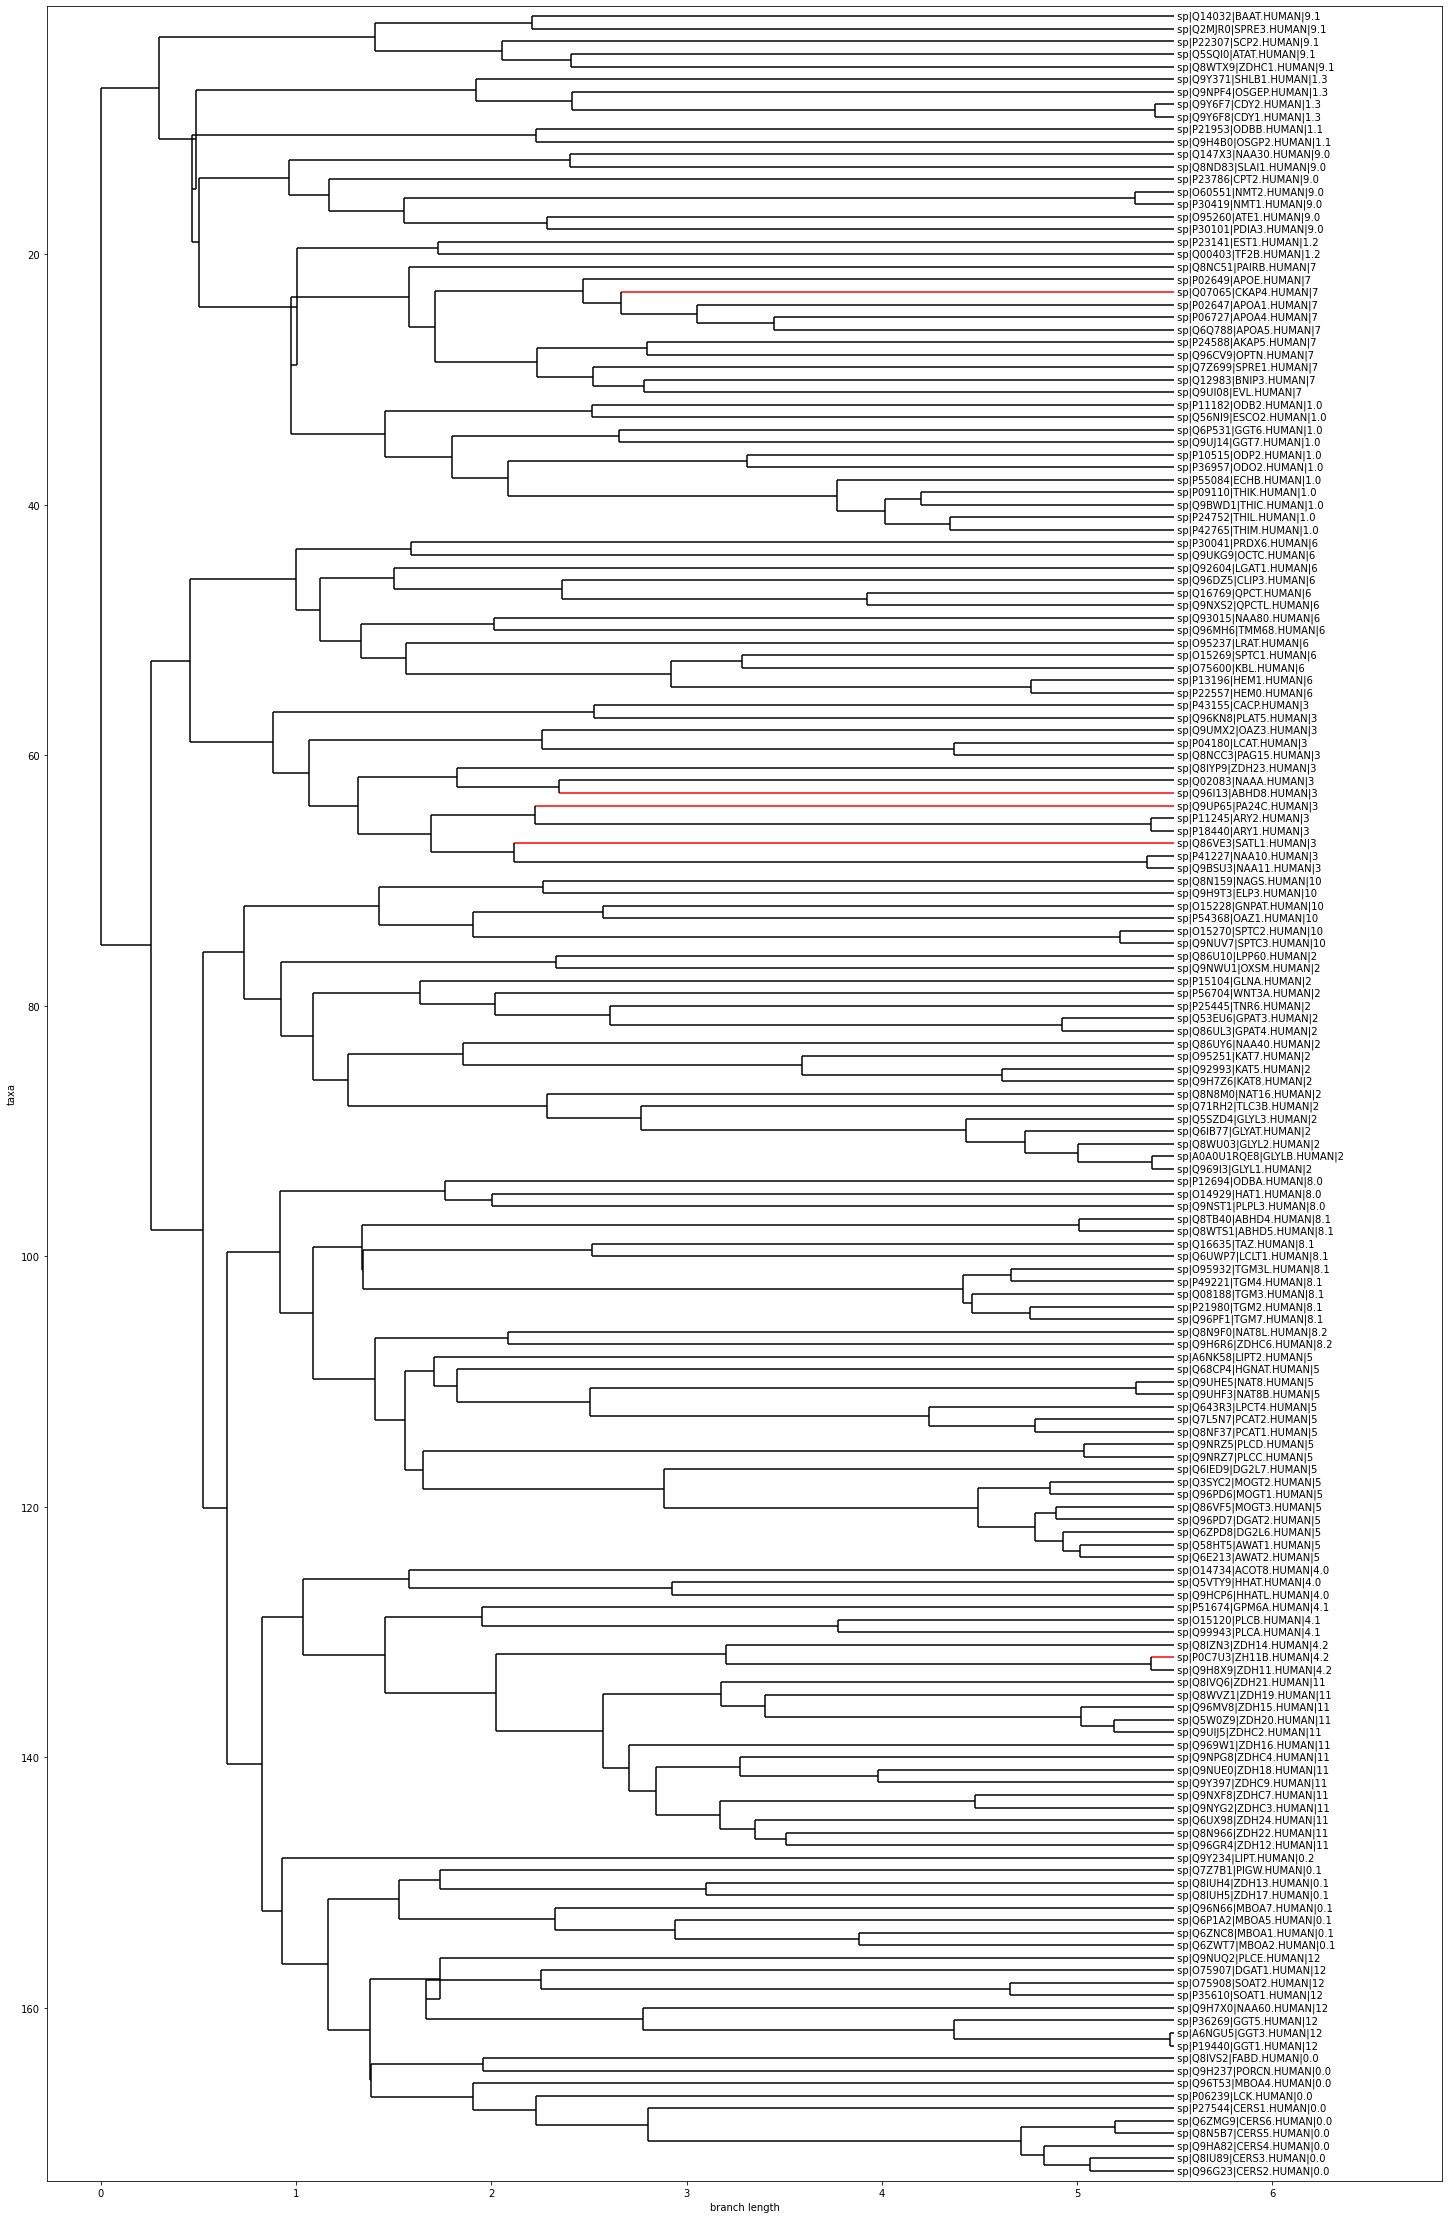

In [1]:
import collections
import pandas as pd
from Bio import Phylo
from Bio.Phylo import PhyloXML
import pylab
import matplotlib.pyplot as plt
import os
import time

tree = Phylo.read("acyltransferase_filtered_homo.tree", "newick")

storage = collections.defaultdict(list)

for i in tree.find_clades():
    if i.name is None:
        continue
    if "." in i.name:
        key = i.name.split("|")[-1]
        storage[key].append(i)

second_storage = collections.defaultdict(list)
for key in storage.keys():
    for item in storage[key]:
        to_pro = item.name.split("|")[2]
        protein_name = to_pro.split(".")[0][:3]
        second_storage[key].append(protein_name)

for key in storage.keys():
    group = storage[key]
    if len(group) == 1:
        continue

    protein_names = []
    for g in group:
        protein_names.append(second_storage[key][group.index(g)])

    common_protein_name = max(set(protein_names), key=protein_names.count)

    first_common_node = None
    last_common_node = None
    for node in group:
        if second_storage[key][group.index(node)] == common_protein_name:
            if first_common_node is None:
                first_common_node = node
            last_common_node = node

    marked_nodes = []
    if first_common_node is not None and last_common_node is not None:
        first_common_node_index = group.index(first_common_node)
        last_common_node_index = group.index(last_common_node)
        protein_name_counter = collections.Counter(protein_names)
        for i in range(first_common_node_index + 1, last_common_node_index):
            node = group[i]
            protein_name = second_storage[key][group.index(node)]
            if protein_name != common_protein_name and protein_name_counter[protein_name] < 2:
                marked_nodes.append(node)
    for node in marked_nodes:
        node.mark = True
        print(f"{node} found between majority node {common_protein_name} of the clade {key}")
        node_obj = tree.find_any(node)
        node_obj.color = 'red'
                
timestamp = time.strftime("%Y%m%d%H%M%S")
output_filename = f"MarkedTree_{timestamp}.xml"
Phylo.write(tree, output_filename, "phyloxml")
tree = Phylo.read(output_filename, "phyloxml")
Phylo.draw(tree, do_show=False)
fig = plt.gcf()
fig.set_size_inches(25, 40)
plt.savefig('./AT_missanno.svg',format='svg')
plt.show()


sp|P85410|OMP5.HAEPR|8.0 found between majority node TOL of the clade 8.0
sp|Q849R1|SEPC.PSEP1|2.0 found between majority node TTG of the clade 2.0
sp|P0C071|MEPC.PSEPU|2.0 found between majority node TTG of the clade 2.0
sp|Q9KJC1|ARPC.PSEPU|2.0 found between majority node TTG of the clade 2.0


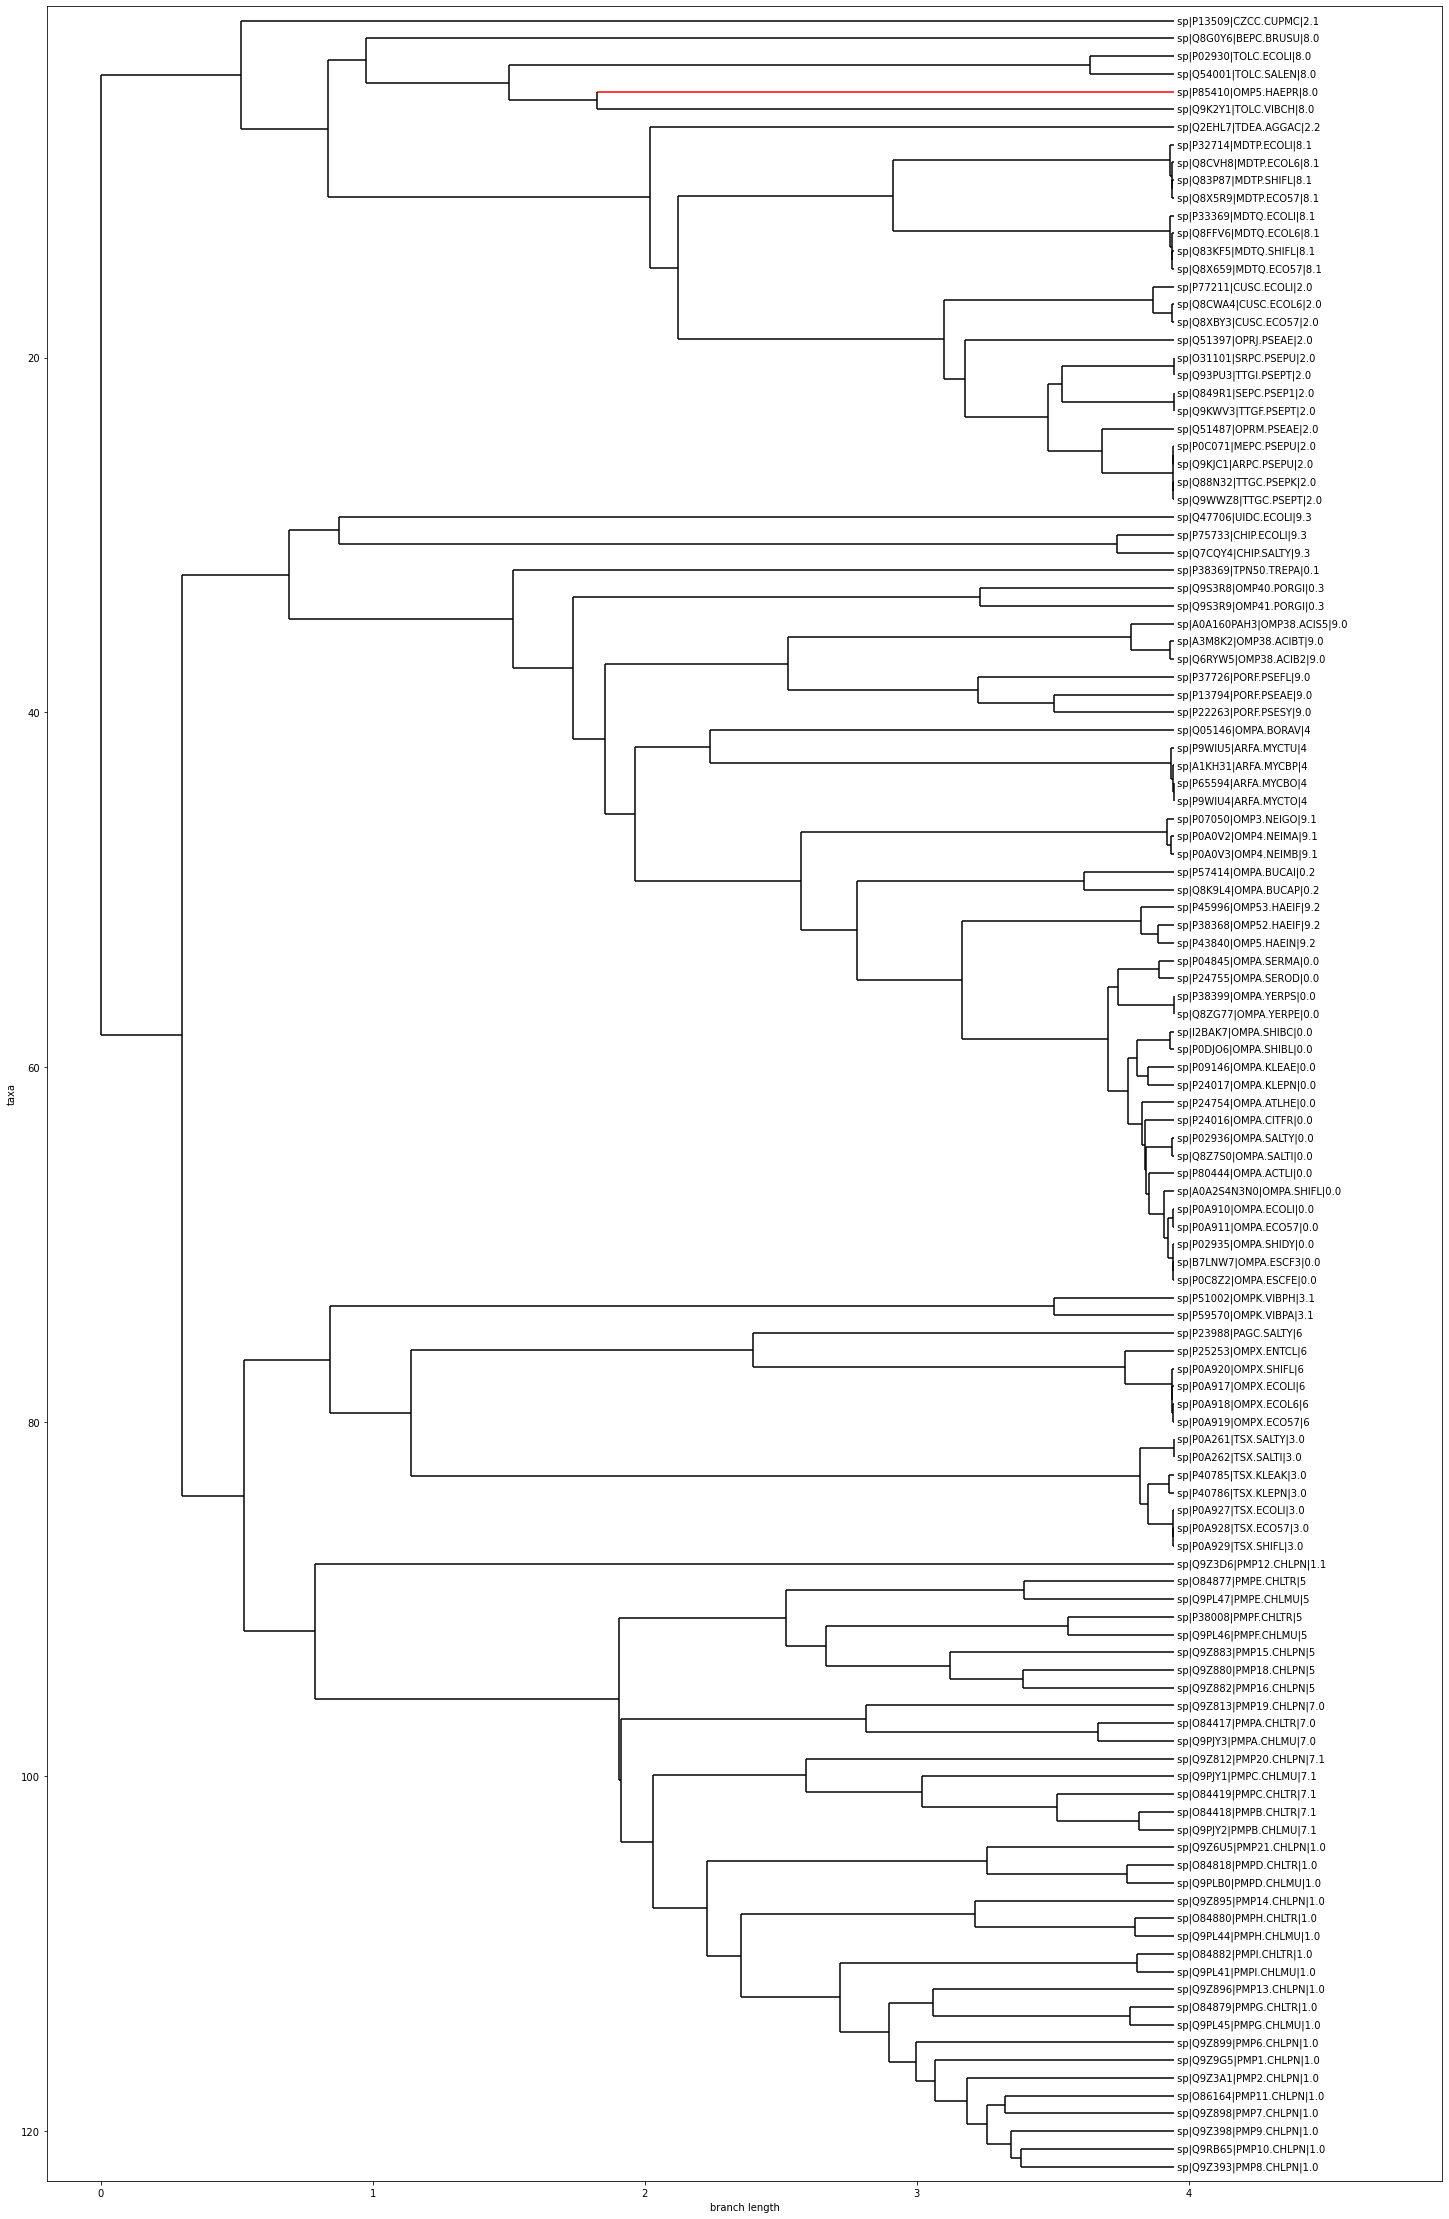

In [2]:
import collections
import pandas as pd
from Bio import Phylo
from Bio.Phylo import PhyloXML
import pylab
import matplotlib.pyplot as plt
import os
import time

tree = Phylo.read("uniprotOMP_muscle_cah_umapemm.tree", "newick")

storage = collections.defaultdict(list)

for i in tree.find_clades():
    if i.name is None:
        continue
    if "." in i.name:
        key = i.name.split("|")[-1]
        storage[key].append(i)


second_storage = collections.defaultdict(list)
for key in storage.keys():
    for item in storage[key]:
        to_pro = item.name.split("|")[2]
        protein_name = to_pro.split(".")[0][:3]
        second_storage[key].append(protein_name)

for key in storage.keys():
    group = storage[key]
    if len(group) == 1:
        continue

    protein_names = []
    for g in group:
        protein_names.append(second_storage[key][group.index(g)])

    
    common_protein_name = max(set(protein_names), key=protein_names.count)


    first_common_node = None
    last_common_node = None
    for node in group:
        if second_storage[key][group.index(node)] == common_protein_name:
            if first_common_node is None:
                first_common_node = node
            last_common_node = node

    
    marked_nodes = []
    if first_common_node is not None and last_common_node is not None:
        first_common_node_index = group.index(first_common_node)
        last_common_node_index = group.index(last_common_node)
        protein_name_counter = collections.Counter(protein_names)
        for i in range(first_common_node_index + 1, last_common_node_index):
            node = group[i]
            protein_name = second_storage[key][group.index(node)]
            if protein_name != common_protein_name and protein_name_counter[protein_name] < 2:
                marked_nodes.append(node)

    for node in marked_nodes:
        node.mark = True
        print(f"{node} found between majority node {common_protein_name} of the clade {key}")
        node_obj = tree.find_any(node)
        node_obj.color = 'red'
                
timestamp = time.strftime("%Y%m%d%H%M%S")
output_filename = f"MarkedTree_{timestamp}.xml"
Phylo.write(tree, output_filename, "phyloxml")
tree = Phylo.read(output_filename, "phyloxml")
Phylo.draw(tree, do_show=False)
fig = plt.gcf()
fig.set_size_inches(25, 40)
plt.savefig('./OMP_missanno.svg',format='svg')
plt.show()


sp|Q9H255|O51E2.HUMAN|3 found between majority node PAQ of the clade 3
sp|P56705|WNT4.HUMAN|1.0 found between majority node APO of the clade 1.0
sp|P61158|ARP3.HUMAN|1.0 found between majority node APO of the clade 1.0
sp|O75881|CP7B1.HUMAN|5 found between majority node CP2 of the clade 5
sp|P10828|THB.HUMAN|9 found between majority node NR1 of the clade 9
sp|P11473|VDR.HUMAN|9 found between majority node NR1 of the clade 9


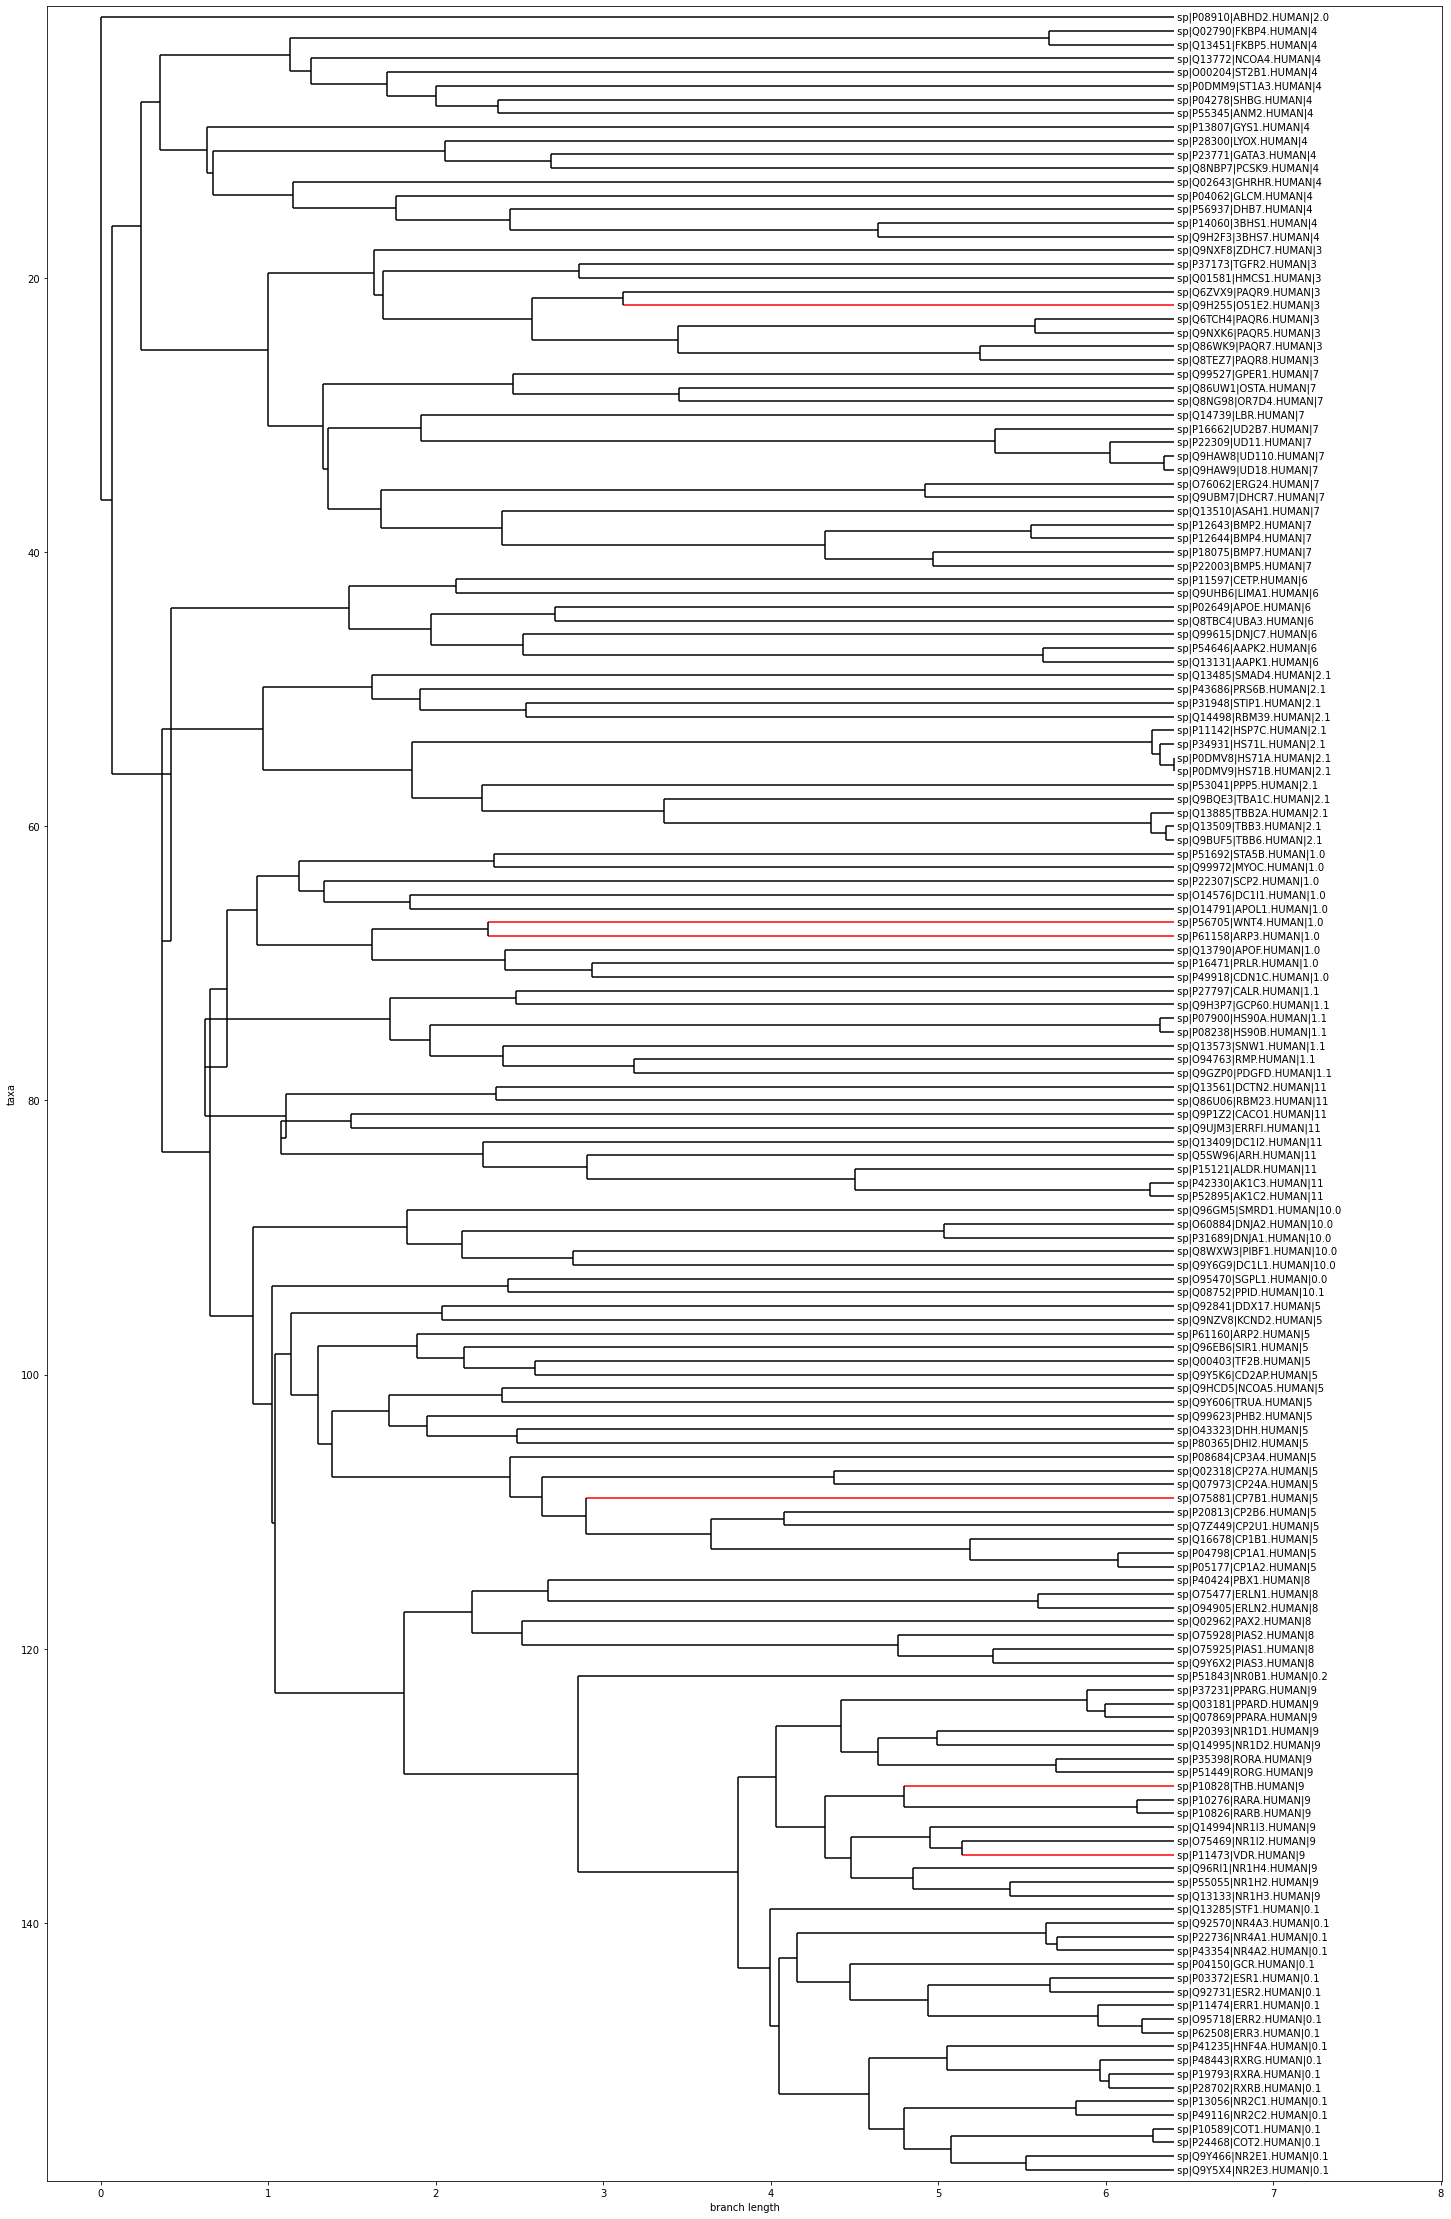

In [3]:
import collections
import pandas as pd
from Bio import Phylo
from Bio.Phylo import PhyloXML
import pylab
import matplotlib.pyplot as plt
import os
import time

# Read the phylogenetic tree, change format if needed
tree = Phylo.read("2022-06-22_receptor-filtered-homo-muscle_umapemm.mean.tree", "newick")

# Create a dictionary to store the clades from the tree
storage = collections.defaultdict(list)

# Store the names of the clades in the dictionary
for i in tree.find_clades():
    if i.name is None:
        continue
    if "." in i.name:
        key = i.name.split("|")[-1]
        storage[key].append(i)

# Create a new dictionary to store the protein names for each clade
second_storage = collections.defaultdict(list)
for key in storage.keys():
    for item in storage[key]:
        to_pro = item.name.split("|")[2]
        protein_name = to_pro.split(".")[0][:3]
        second_storage[key].append(protein_name)

# Iterate over the groups of clades in the storage dictionary
for key in storage.keys():
    group = storage[key]
    if len(group) == 1:
        continue

    # Create a list of the protein names for each clade in the group
    protein_names = []
    for g in group:
        protein_names.append(second_storage[key][group.index(g)])

    # Find the most common protein name in the group
    common_protein_name = max(set(protein_names), key=protein_names.count)

    # Find the first and last nodes with the most common protein name in the clade
    first_common_node = None
    last_common_node = None
    for node in group:
        if second_storage[key][group.index(node)] == common_protein_name:
            if first_common_node is None:
                first_common_node = node
            last_common_node = node

    # Find the nodes that are between the first and last nodes with the most common protein name and repeated < twice
    marked_nodes = []
    if first_common_node is not None and last_common_node is not None:
        first_common_node_index = group.index(first_common_node)
        last_common_node_index = group.index(last_common_node)
        protein_name_counter = collections.Counter(protein_names)
        for i in range(first_common_node_index + 1, last_common_node_index):
            node = group[i]
            protein_name = second_storage[key][group.index(node)]
            if protein_name != common_protein_name and protein_name_counter[protein_name] < 2:
                marked_nodes.append(node)
    # Mark the nodes that are between the first and last nodes with the most common protein name
    for node in marked_nodes:
        node.mark = True
        print(f"{node} found between majority node {common_protein_name} of the clade {key}")
        node_obj = tree.find_any(node)
        node_obj.color = 'red'
                
# Write marked tree and plot it
timestamp = time.strftime("%Y%m%d%H%M%S")
output_filename = f"MarkedTree_{timestamp}.xml"
Phylo.write(tree, output_filename, "phyloxml")
tree = Phylo.read(output_filename, "phyloxml")
Phylo.draw(tree, do_show=False)
fig = plt.gcf()
fig.set_size_inches(25, 40)
plt.savefig('./NR_missanno.svg',format='svg')
plt.show()


sp|Q9UBQ7|GRHPR_HUMAN|8.0 found between majority node QOR of the clade 8.0
sp|P15428|PGDH_HUMAN|1.0 found between majority node DHR of the clade 1.0
sp|Q99714|HCD2_HUMAN|1.0 found between majority node DHR of the clade 1.0
sp|Q7Z4W1|DCXR_HUMAN|1.0 found between majority node DHR of the clade 1.0
sp|Q9BUT1|BDH2_HUMAN|1.0 found between majority node DHR of the clade 1.0
sp|Q9BY49|PECR_HUMAN|7.1 found between majority node DEC of the clade 7.1
sp|O75911|DHRS3_HUMAN|7.0 found between majority node DHB of the clade 7.0


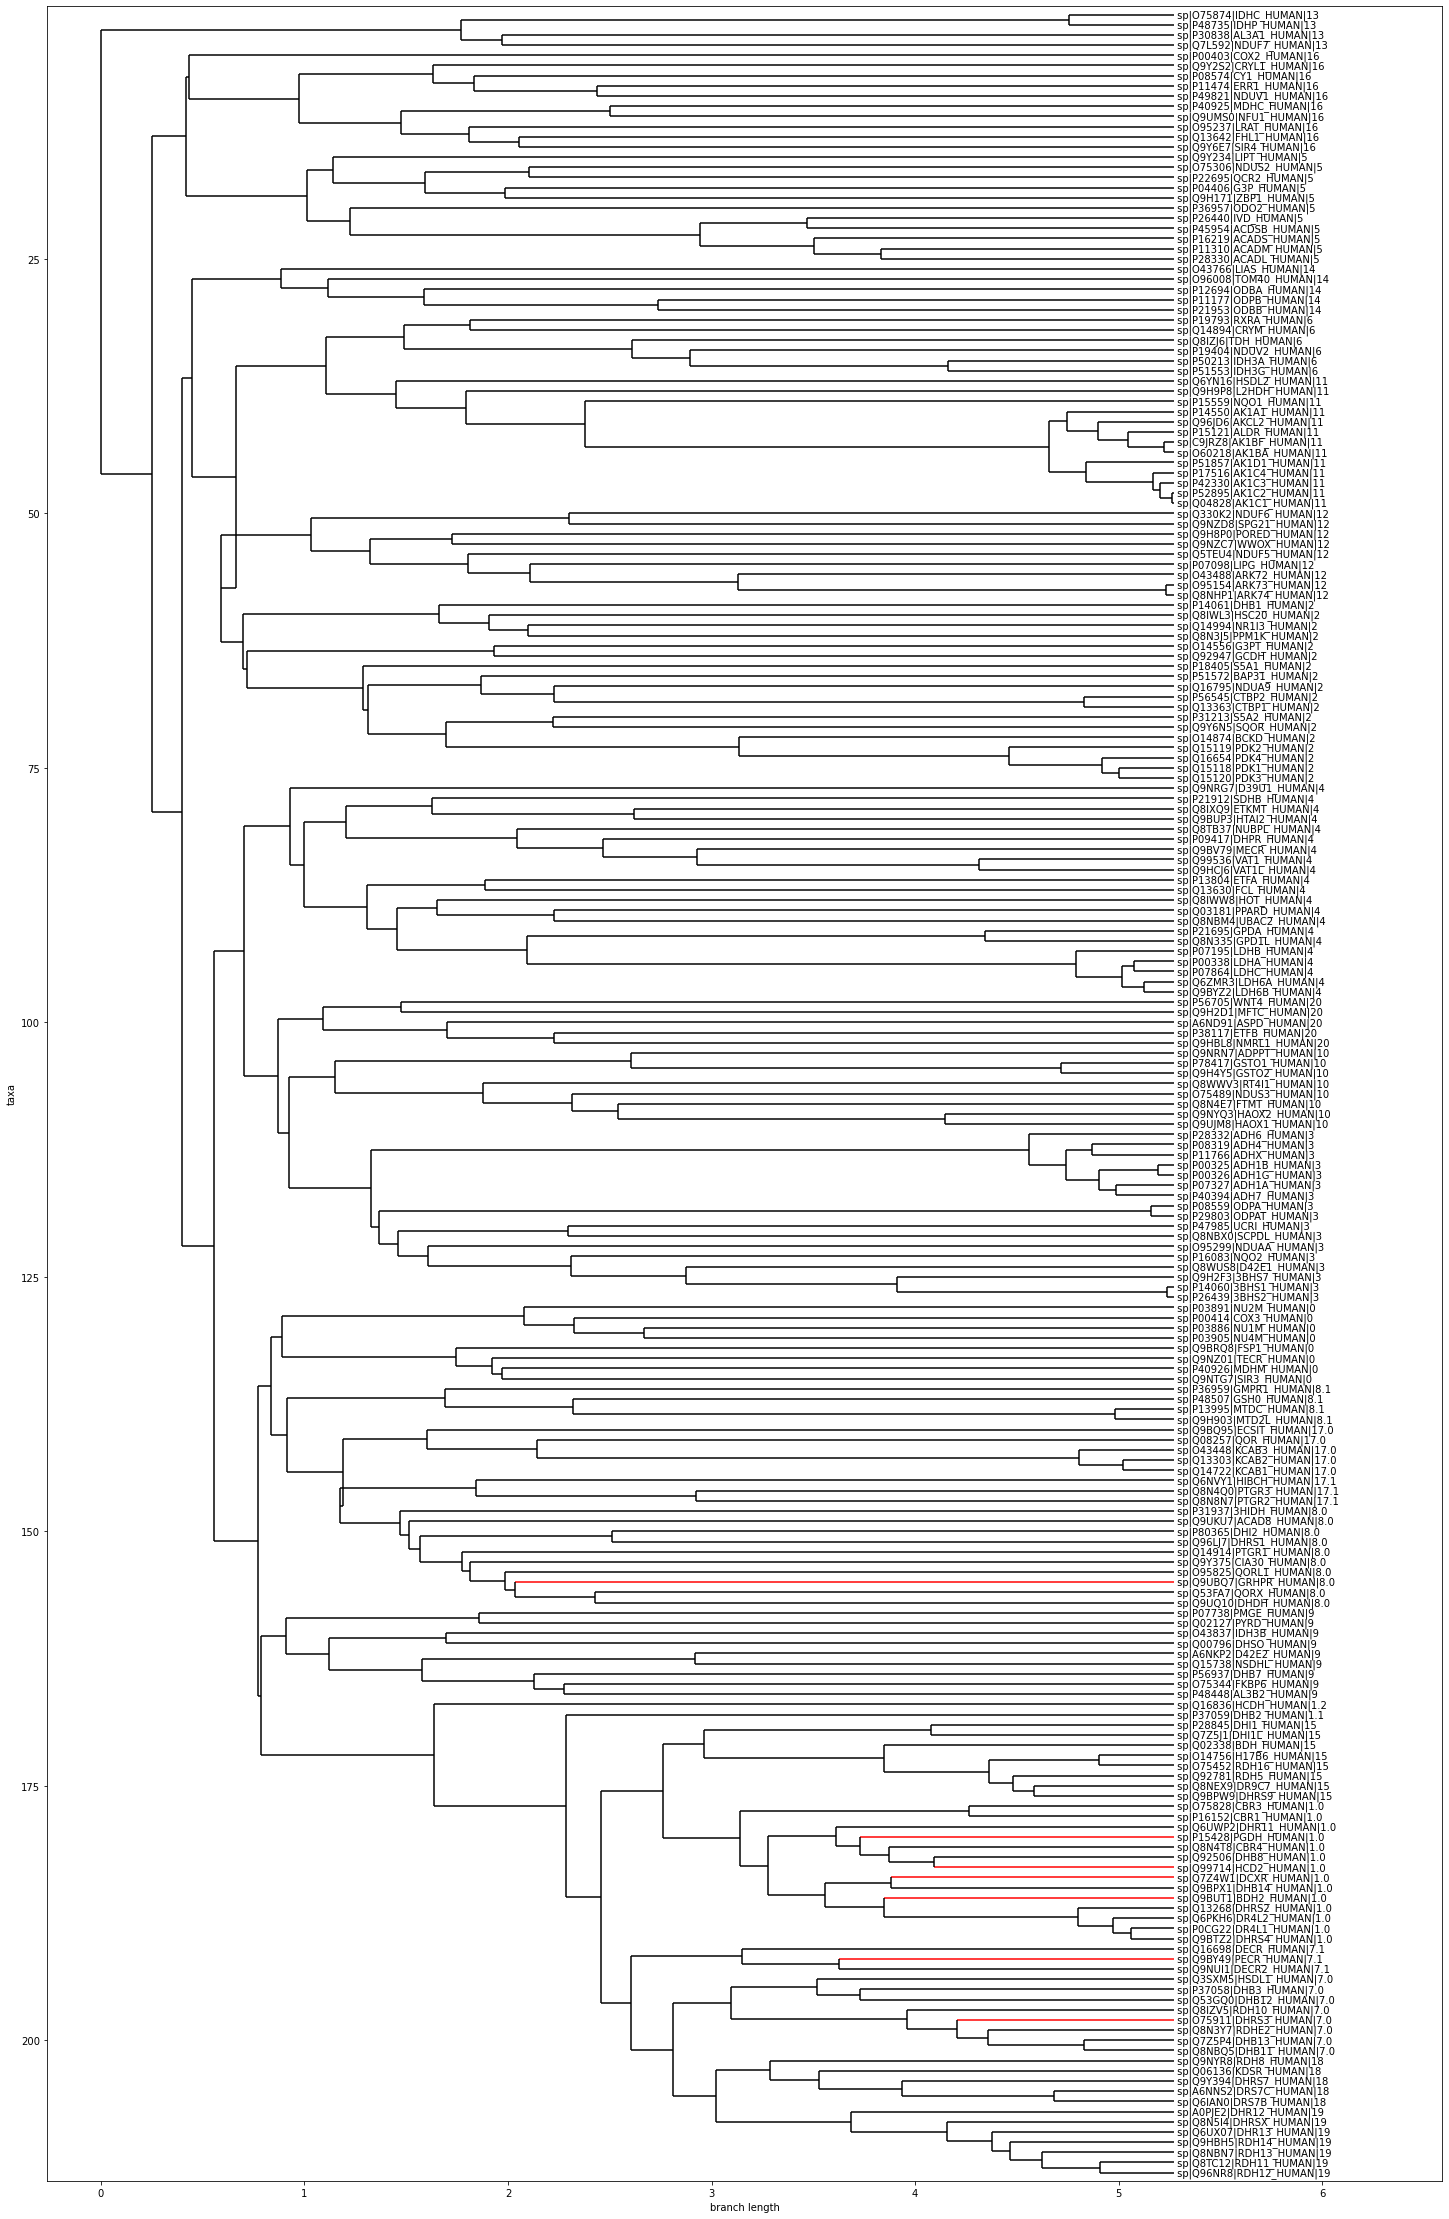

In [4]:
import collections
import pandas as pd
from Bio import Phylo
from Bio.Phylo import PhyloXML
import pylab
import matplotlib.pyplot as plt
import os
import time

tree = Phylo.read("2022-06_uniprot-dehydrogenase-filtered-homo-muscleumapemm.1111.mean.tree", "newick")

storage = collections.defaultdict(list)

for i in tree.find_clades():
    if i.name is None:
        continue
    if "." in i.name:
        key = i.name.split("|")[-1]
        storage[key].append(i)

second_storage = collections.defaultdict(list)
for key in storage.keys():
    for item in storage[key]:
        to_pro = item.name.split("|")[2]
        protein_name = to_pro.split(".")[0][:3]
        second_storage[key].append(protein_name)

for key in storage.keys():
    group = storage[key]
    if len(group) == 1:
        continue

    protein_names = []
    for g in group:
        protein_names.append(second_storage[key][group.index(g)])


    common_protein_name = max(set(protein_names), key=protein_names.count)

    first_common_node = None
    last_common_node = None
    for node in group:
        if second_storage[key][group.index(node)] == common_protein_name:
            if first_common_node is None:
                first_common_node = node
            last_common_node = node


    marked_nodes = []
    if first_common_node is not None and last_common_node is not None:
        first_common_node_index = group.index(first_common_node)
        last_common_node_index = group.index(last_common_node)
        protein_name_counter = collections.Counter(protein_names)
        for i in range(first_common_node_index + 1, last_common_node_index):
            node = group[i]
            protein_name = second_storage[key][group.index(node)]
            if protein_name != common_protein_name and protein_name_counter[protein_name] < 2:
                marked_nodes.append(node)

    for node in marked_nodes:
        node.mark = True
        print(f"{node} found between majority node {common_protein_name} of the clade {key}")
        node_obj = tree.find_any(node)
        node_obj.color = 'red'
                

timestamp = time.strftime("%Y%m%d%H%M%S")
output_filename = f"MarkedTree_{timestamp}.xml"
Phylo.write(tree, output_filename, "phyloxml")
tree = Phylo.read(output_filename, "phyloxml")
Phylo.draw(tree, do_show=False)
fig = plt.gcf()
fig.set_size_inches(25, 40)
plt.savefig('./DH_missanno.svg',format='svg')
plt.show()


In [ ]:
# Full tip labels random location same topology

random_tree.newick


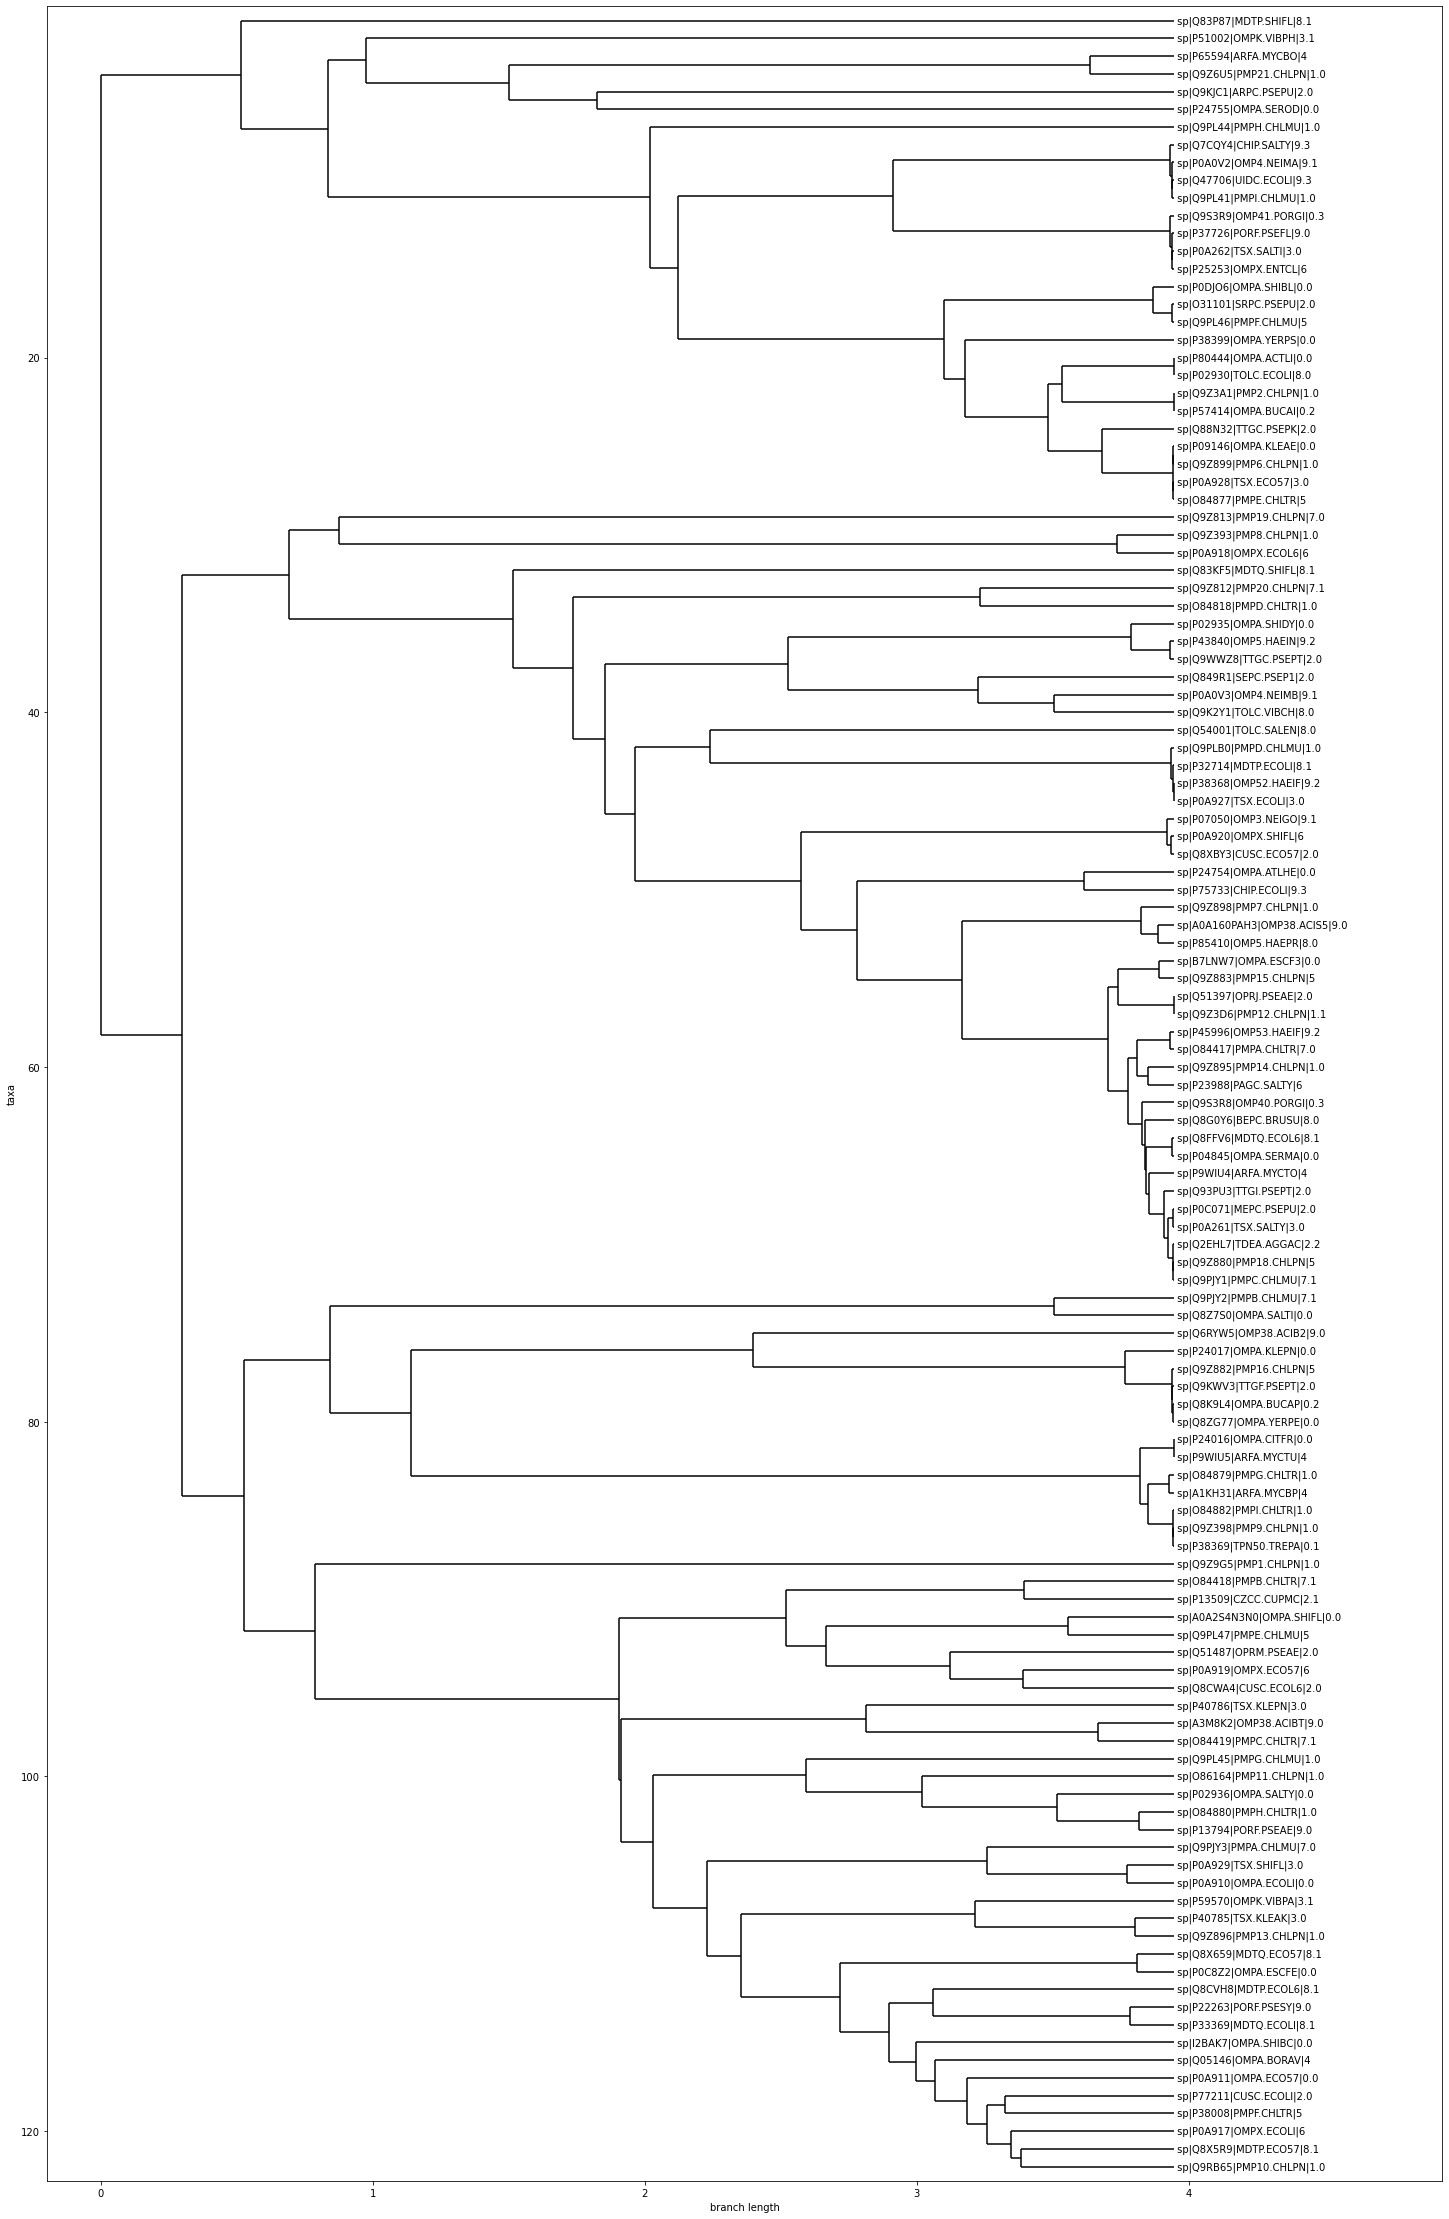

In [3]:
import random
from Bio import Phylo
import time
import matplotlib.pyplot as plt

def randomize_tip_labels(tree):
    original_tips = tree.get_terminals()
    original_names = [tip.name for tip in original_tips]
    #random.seed(42)
    randomized_names = original_names.copy()
    random.shuffle(randomized_names)

    for original_tip, new_name in zip(original_tips, randomized_names):
        original_tip.name = new_name

tree = Phylo.read("uniprotOMP_muscle_cah_umapemm.tree", "newick")

randomize_tip_labels(tree)

timestamp = time.strftime("%Y%m%d%H%M%S")
output_filename = f"random_tree.newick"
Phylo.write(tree, output_filename, "newick")
tree = Phylo.read(output_filename, "newick")

timestamp = time.strftime("%Y%m%d%H%M%S")
output_filename = f"random_tree.newick"
print(output_filename)
Phylo.write(tree, output_filename, "newick")
tree = Phylo.read(output_filename, "newick")
Phylo.draw(tree, do_show=False)
fig = plt.gcf()
fig.set_size_inches(25, 40)
plt.show()


In [155]:
#edit this with parsimony scorer ************************************

In [16]:
# Parsimony Scorer

In [4]:
import dendropy
from dendropy.model.parsimony import fitch_down_pass

original_tree = Phylo.read("original_tree.nexus", "nexus")
orginal_taxa = original_tree

random_tree = Phylo.read("random_tree.nexus", "nexus")

tree = dendropy.Tree.get(
            path="uniprotOMP_muscle_cah_umapemm.tree",
            schema="newick",
            label=None,
            taxon_namespace=None,
            collection_offset=None,
            tree_offset=None,
            rooting="default-rooted",
            edge_length_type=float,
            suppress_edge_lengths=False,
            extract_comment_metadata=True,
            store_tree_weights=False,
            finish_node_fn=None,
            case_sensitive_taxon_labels=False,
            preserve_underscores=False,
            suppress_internal_node_taxa=True,
            suppress_leaf_node_taxa=False,
            terminating_semicolon_required=True,
            ignore_unrecognized_keyword_arguments=False,)
taxa_list = list(tree.taxon_namespace)
annotation_list = []
for taxa in tree.taxon_namespace:
    annotation_list.append(str(taxa).split('|')[2][:3])

annotation_set = list(set(annotation_list))
taxon_state_sets_map = {}
for taxa in tree.taxon_namespace:
    state = annotation_set.index(str(taxa).split('|')[2][:3])
    taxon_state_sets_map[taxa] = [set([state])]

score = fitch_down_pass(tree.postorder_node_iter(),
        taxon_state_sets_map=taxon_state_sets_map)
print(score)


#print(taxon_state_sets_map)
for taxa, state in taxon_state_sets_map.items():
    taxon_state_sets_map[taxa] = random.choice(list(taxon_state_sets_map.values()))
taxon, states = random.choice(list(taxon_state_sets_map.items()))
score = fitch_down_pass(tree.postorder_node_iter(),
        taxon_state_sets_map=taxon_state_sets_map)
print(score)




random.shuffle(taxa_list)
random.shuffle(taxa_list)

annotation_set = list(set(annotation_list))
taxon_state_sets_map_random = {}
for i, taxa in enumerate(tree.taxon_namespace):
    anno_taxa = taxa_list[i]
    state = annotation_set.index(str(anno_taxa).split('|')[2][:3])
    tree_taxa = tree.taxon_namespace[i]
    taxon_state_sets_map_random[tree_taxa] = [set([state])]
    
og_score = fitch_down_pass(
        tree.postorder_node_iter(),
        taxon_state_sets_map=taxon_state_sets_map_random)
print(og_score)


22
22
22


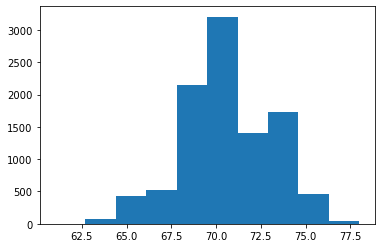

In [7]:
import random
from Bio import Phylo
import time
import matplotlib.pyplot as plt
import dendropy
from dendropy.model.parsimony import fitch_down_pass

def randomize_tip_labels(tree):
    original_tips = tree.get_terminals()
    original_names = [tip.name for tip in original_tips]
    #random.seed(42)
    randomized_names = original_names.copy()
    random.shuffle(randomized_names)

    for original_tip, new_name in zip(original_tips, randomized_names):
        original_tip.name = new_name

scores = []
for i in range(10000):
    start_tree = Phylo.read("uniprotOMP_muscle_cah_umapemm.tree", "newick")

    randomize_tip_labels(start_tree)

    timestamp = time.strftime("%Y%m%d%H%M%S")
    output_filename = f"random_tree.newick"
    Phylo.write(start_tree, output_filename, "newick")

    tree = dendropy.Tree.get(
                path=output_filename,
                schema="newick",
                label=None,
                taxon_namespace=None,
                collection_offset=None,
                tree_offset=None,
                rooting="default-rooted",
                edge_length_type=float,
                suppress_edge_lengths=False,
                extract_comment_metadata=True,
                store_tree_weights=False,
                finish_node_fn=None,
                case_sensitive_taxon_labels=False,
                preserve_underscores=False,
                suppress_internal_node_taxa=True,
                suppress_leaf_node_taxa=False,
                terminating_semicolon_required=True,
                ignore_unrecognized_keyword_arguments=False,)
    taxa_list = list(tree.taxon_namespace)
    annotation_list = []
    for taxa in tree.taxon_namespace:
        annotation_list.append(str(taxa).split('|')[2][:3])

    annotation_set = list(set(annotation_list))
    taxon_state_sets_map = {}
    for taxa in tree.taxon_namespace:
        state = annotation_set.index(str(taxa).split('|')[2][:3])
        taxon_state_sets_map[taxa] = [set([state])]

    score = fitch_down_pass(tree.postorder_node_iter(),
            taxon_state_sets_map=taxon_state_sets_map)
    #print(score)
    scores.append(score)
plt.hist(scores)
plt.show() 

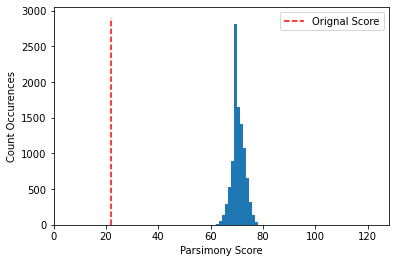

In [18]:
plt.hist(scores,bins=15)
plt.xlim([0,max(scores)+50])
plt.vlines(og_score,0,2900,colors='red',linestyle='dashed',label='Orignal Score')
plt.xlabel('Parsimony Score')
plt.ylabel('Count Occurences')
plt.legend()
plt.savefig('./random_parsimony.svg',format='svg')
plt.show() 

In [83]:

#The tree is first encoded as a set of bipartitions or splits. Each bipartition splits the set of taxa into two subsets. For example, in a tree with four taxa A, B, C, and D, one possible bipartition would be {A,B} | {C,D}.

#Dendropy then counts the number of times each character in the input data set conflicts with each bipartition. A character conflicts with a bipartition if the states of the two subsets of taxa defined by the bipartition are inconsistent with the character's observed states.

#For each bipartition, the total number of conflicting characters is summed. The total number of conflicting characters across all bipartitions is the parsimony score of the tree.

#The goal of parsimony analysis is to find the tree with the lowest possible parsimony score, indicating the tree that requires the fewest evolutionary changes to explain the observed data.


#https://dendropy.org/_modules/dendropy/model/parsimony.html

In [ ]:

nchar = max(len(tip.name) for tip in tree.get_terminals())


tip_states = [state.ljust(nchar, "?") for state in tip_states]
random.shuffle(tip_states)


sequences = []
for i, tip in enumerate(original_tree.get_terminals()):
    seq = Seq(tip_states[i])
    seq_record = SeqRecord(seq, id=tip.name)
    sequences.append(seq_record)


alignment = MultipleSeqAlignment(sequences)


with open("character_matrix.nexus", "w") as handle:
    handle.write("#NEXUS\n")
    handle.write("BEGIN DATA;\n")
    handle.write(f"DIMENSIONS NTAX={len(alignment)} NCHAR={nchar};\n")
    handle.write("FORMAT DATATYPE=DNA MISSING=? GAP=-;\n")
    handle.write("MATRIX\n")
    for seq_record in alignment:
        handle.write(f"{seq_record.id}\t{str(seq_record.seq)}\n")
    handle.write(";\n")
    handle.write("END;\n")


original_score = original_tree.score(alignment, method="cf")
random_score = random_tree.score(alignment, method="cf")


print(f"Original tree parsimony score: {original_score}")
print(f"Randomized tree parsimony score: {random_score}")
print(f"Randomized tree is {original_score/random_score:.2f} times less parsimonious than the original tree.")


In [ ]:
Character Matrix Generator INCOMPLETE

In [5]:
from Bio import Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
import random


tree = Phylo.read("original_tree.nexus", "nexus")


nchar = max(len(tip.name) for tip in tree.get_terminals())


tip_states = [tip.name for tip in tree.get_terminals()]
random.shuffle(tip_states)


sequences = []
for i, tip in enumerate(tree.get_terminals()):
    seq_str = tip_states[i]
    seq_str = seq_str.ljust(nchar, "-")  # Pad the sequence with gaps
    seq = Seq(seq_str)
    seq_record = SeqRecord(seq, id=tip.name)
    sequences.append(seq_record)


alignment = MultipleSeqAlignment(sequences)


with open("character_matrix.nexus", "w") as handle:
    handle.write("#NEXUS\n")
    handle.write("BEGIN DATA;\n")
    handle.write(f"DIMENSIONS NTAX={len(alignment)} NCHAR={nchar};\n")
    handle.write("FORMAT DATATYPE=DNA MISSING=? GAP=-;\n")
    handle.write("MATRIX\n")
    for seq_record in alignment:
        handle.write(f"{seq_record.id}\t{str(seq_record.seq)}\n")
    handle.write(";\n")
    handle.write("END;\n")

In [6]:
# PW distance Checker

In [7]:
import pandas as pd
from Bio import Phylo
from itertools import combinations

def tip_pairwise_distances(tree_file):
    tree = Phylo.read(tree_file, 'newick')
    leaves = tree.get_terminals()
    tip_distances = []

    for leaf1, leaf2 in combinations(leaves, 2):
        distance = tree.distance(leaf1, leaf2)
        tip_distances.append((leaf1.name, leaf2.name, distance))

    return tip_distances

def display_distances(distances):
    df = pd.DataFrame(distances, columns=['Tip 1', 'Tip 2', 'Distance'])
    return df

original_tree_file = "original_tree.newick"
random_tree_file = "random_tree.newick"

original_tip_distances = tip_pairwise_distances(original_tree_file)
random_tip_distances = tip_pairwise_distances(random_tree_file)

print("Original tree tip pairwise distances:")
print(display_distances(original_tip_distances))

print("\nRandom tree tip pairwise distances:")
print(display_distances(random_tip_distances))


Original tree tip pairwise distances:
                          Tip 1                      Tip 2  Distance
0      sp|P13509|CZCC.CUPMC|2.1   sp|Q8G0Y6|BEPC.BRUSU|8.0   6.86300
1      sp|P13509|CZCC.CUPMC|2.1   sp|P02930|TOLC.ECOLI|8.0   6.86300
2      sp|P13509|CZCC.CUPMC|2.1   sp|Q54001|TOLC.SALEN|8.0   6.86300
3      sp|P13509|CZCC.CUPMC|2.1   sp|P85410|OMP5.HAEPR|8.0   6.86300
4      sp|P13509|CZCC.CUPMC|2.1   sp|Q9K2Y1|TOLC.VIBCH|8.0   6.86300
...                         ...                        ...       ...
7376   sp|Q9Z898|PMP7.CHLPN|1.0  sp|Q9RB65|PMP10.CHLPN|1.0   1.37891
7377   sp|Q9Z898|PMP7.CHLPN|1.0   sp|Q9Z393|PMP8.CHLPN|1.0   1.37891
7378   sp|Q9Z398|PMP9.CHLPN|1.0  sp|Q9RB65|PMP10.CHLPN|1.0   1.19996
7379   sp|Q9Z398|PMP9.CHLPN|1.0   sp|Q9Z393|PMP8.CHLPN|1.0   1.19996
7380  sp|Q9RB65|PMP10.CHLPN|1.0   sp|Q9Z393|PMP8.CHLPN|1.0   1.12678

[7381 rows x 3 columns]

Random tree tip pairwise distances:
                         Tip 1                      Tip 2  Distance
0   

In [8]:
#The tip_pairwise_distances() function calculates the pairwise distances between all pairs of tip nodes (every possible combination) in the tree using the Phylo.distance() method from Biopython. For each pair of leaf nodes, it calculates the path length along the branches between them and stores this distance in a list.

#The pairwise distances are the overall similarity between the tip nodes in each tree. The larger the pairwise distance between two tip nodes, the more dissimilar they are. By comparing the pairwise distances between the tips in the original tree and the random tree, we can see if the randomization process has significantly changed the overall similarity pattern between the tips. If the random tree has similar pairwise distances as the original tree, then we can say that the randomization process has not significantly altered the overall similarity pattern among the tip nodes.

In [9]:
Duplicate checker

SyntaxError: invalid syntax (1014885781.py, line 1)

In [ ]:
from ete3 import Tree

original_tree_file = "original_tree.newick"
random_tree_file = "random_tree.newick"

def load_tree(tree_file):
    tree = Tree(tree_file, quoted_node_names=True, format=0)
    return tree

original_tree = load_tree(original_tree_file)
random_tree = load_tree(random_tree_file)

rf_distance = original_tree.robinson_foulds(random_tree, unrooted_trees=True)

def find_duplicate_leaf_names(tree):
    leaf_names = [leaf.name for leaf in tree.get_leaves()]
    duplicates = set([name for name in leaf_names if leaf_names.count(name) > 1])
    return duplicates

original_tree = Tree("original_tree.newick", format=1)
random_tree = Tree("random_tree.newick", format=1)

duplicates_original = find_duplicate_leaf_names(original_tree)
duplicates_random = find_duplicate_leaf_names(random_tree)

def print_duplicates(tree_name, duplicates):
    if not duplicates:
        print(f"No duplicated leaf names found in {tree_name}")
    else:
        print(f"Duplicated leaf names in {tree_name}: {', '.join(duplicates)}")

print_duplicates("original tree", duplicates_original)
print_duplicates("random tree", duplicates_random)


In [ ]:
#Null distribution scorer on X generated trees --> graph this somehow?
#Generate random trees with same topology 

In [32]:
import dendropy
from Bio import Phylo
from Bio.Phylo import BaseTree
import random
from io import StringIO

original_tree = Phylo.read("original_tree.newick", "newick")

original_parsimony_score = original_tree.total_branch_length()


num_random_trees = 100
random_parsimony_scores = []

for _ in range(num_random_trees):
    random_tree = dendropy.Tree.get(path="original_tree.newick", schema="newick")
    
    tip_labels = [leaf.taxon.label for leaf in random_tree.leaf_nodes()]
    random.shuffle(tip_labels)
    for leaf, new_label in zip(random_tree.leaf_nodes(), tip_labels):
        leaf.taxon.label = new_label

    random_tree_newick = random_tree.as_string(schema="newick")
    random_tree_bio = Phylo.read(StringIO(random_tree_newick), "newick")
   
    random_parsimony_score = random_tree_bio.total_branch_length()
    random_parsimony_scores.append(random_parsimony_score)


original_tree_percentile = sum(
    score <= original_parsimony_score for score in random_parsimony_scores
) / num_random_trees

print(f"Original tree parsimony score: {original_parsimony_score}")
print(f"Random trees parsimony scores (null distribution): {random_parsimony_scores}")
print(f"Original tree parsimony score percentile: {original_tree_percentile}")


Original tree parsimony score: 103.13257999999995
Random trees parsimony scores (null distribution): [103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995, 103.13257999999995

In [ ]:
Cophenetic Distance Analysis

In [31]:
import dendropy
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr, spearmanr

def cophenetic_matrix(tree):
    pdm = tree.phylogenetic_distance_matrix()
    return pdm.as_data_table()

def distance_matrix_to_array(matrix):
    n = len(matrix)
    condensed_matrix = [matrix[i, j] for i in range(n) for j in range(i+1, n)]
    return np.array(condensed_matrix)


original_tree = dendropy.Tree.get(path="original_tree.newick", schema="newick")
random_tree = dendropy.Tree.get(path="random_tree.newick", schema="newick")


original_cophenetic_matrix = cophenetic_matrix(original_tree)
random_cophenetic_matrix = cophenetic_matrix(random_tree)

original_cophenetic_array = distance_matrix_to_array(original_cophenetic_matrix)
random_cophenetic_array = distance_matrix_to_array(random_cophenetic_matrix)

print(original_cophenetic_array)


pearson_correlation, pearson_p_value = pearsonr(original_cophenetic_array, random_cophenetic_array)
spearman_correlation, spearman_p_value = spearmanr(original_cophenetic_array, random_cophenetic_array)

print(f"Pearson correlation: {pearson_correlation}, p-value: {pearson_p_value}")
print(f"Spearman correlation: {spearman_correlation}, p-value: {spearman_p_value}")


[7.89204 7.89204 7.89203 ... 7.29744 7.29746 3.43808]
Pearson correlation: 0.01170896335870303, p-value: 0.31450538754443663
Spearman correlation: -0.013583439647119933, p-value: 0.24327224999846359


In [ ]:
#The cophenetic matrix is a matrix that shows the pairwise distance between all pairs of tips in a phylogenetic tree. The 1D array version of the matrix is used to calculate the correlation coefficient between the cophenetic matrices of the original and random trees. The correlation coefficients are calculated using both Pearson's correlation and Spearman's correlation, along with their respective p-values, which are measures of how confident we can be that the correlation is real and not just due to chance. Where closer to 1 is correlative and 0 uncorrelative.

#It is calculated by taking the branch lengths of the tree and calculating the distances between each pair of tips by summing the lengths of the branches between them. This results in a matrix where each row and column represents a tip in the tree, and the value in each cell represents the pairwise distance between the corresponding tips.

#The pearsonr and spearmanr functions calculate the Pearson correlation coefficient and Spearman's rank correlation coefficient, respectively, between two arrays. In this case, the arrays being compared are the flattened versions of the cophenetic matrices for the original and random trees.

In [ ]:
AutoPhy Tree Coloring Chunk

In [57]:
'''
reclustBPtree = Phylogeny.from_tree(BPtree)
reclustBPtree.rooted = True

handle = StringIO(finalStrTree)
reclustBPtree = Phylo.read(OUTTREE,"newick")
reclustBPtree.ladderize()


#color tree
reclustBPtree.root.color = (128, 128, 128) 


mps=[]
k=0
for v in clusthash.values():
    if len(v)==1:
        try:
            mrca = reclustBPtree.common_ancestor(v)
            indexcol = v[0].split("|")[-1]
            mrca.color = plotColor[indexcol]
        except:
            pass
            mrca = reclustBPtree.common_ancestor('.'.join(v[0].split('.')[:-1]))
            indexcol = v[0].split("|")[-1]
            mrca.color = plotColor[indexcol]
    for i in range(len(v)-1):

        try:
            mrca = reclustBPtree.common_ancestor(v[i], v[i+1])
            indexcol = v[i].split("|")[-1]
            mrca.color = plotColor[indexcol]
        except ValueError:
            # Phylo.draw_ascii(reclustBPtree)  

            mrca = reclustBPtree.common_ancestor('.'.join(v[i].split('.')[:-1]), 
                                                 '.'.join(v[i+1].split('.')[:-1]))
            indexcol = v[i].split("|")[-1] 
            mrca.color = plotColor[indexcol] 
            pass              
    k+=1     

print(v,k)

with plt.rc_context({'lines.linewidth': 4}):
    matplotlib.rc('font', size=0.0)
    fig = plt.figure(figsize=(8,HEIGHT), dpi=200)
    axes = fig.add_subplot(1, 1, 1)
    plt.rc('font', size=6)          # controls default text sizes #HERE IS THE SETTING FOR THAT ALLOWS ME TO HIDE THE BRANCH TIP LABELS
    plt.rc('axes', titlesize=14)     # fontsize of the axes title
    plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
    plt.rc('figure', titlesize=18)   # fontsize of the figure title
    Phylo.draw(reclustBPtree,axes=axes,do_show=False,branch_labels=None)
    plt.savefig("../data/"+FAM+"colored/2022-06-b22_"+str(n_H)+"_EMClust_"+FAM+TREEID+"_"+metric+"_coloredtree.svg",format='svg',dpi=600)
    plt.show()'''

'\nreclustBPtree = Phylogeny.from_tree(BPtree)\nreclustBPtree.rooted = True\n\nhandle = StringIO(finalStrTree)\nreclustBPtree = Phylo.read(OUTTREE,"newick")\nreclustBPtree.ladderize()\n\n\n#color tree\nreclustBPtree.root.color = (128, 128, 128) \n\n\nmps=[]\nk=0\nfor v in clusthash.values():\n    if len(v)==1:\n        try:\n            mrca = reclustBPtree.common_ancestor(v)\n            indexcol = v[0].split("|")[-1]\n            mrca.color = plotColor[indexcol]\n        except:\n            pass\n            mrca = reclustBPtree.common_ancestor(\'.\'.join(v[0].split(\'.\')[:-1]))\n            indexcol = v[0].split("|")[-1]\n            mrca.color = plotColor[indexcol]\n    for i in range(len(v)-1):\n\n        try:\n            mrca = reclustBPtree.common_ancestor(v[i], v[i+1])\n            indexcol = v[i].split("|")[-1]\n            mrca.color = plotColor[indexcol]\n        except ValueError:\n            # Phylo.draw_ascii(reclustBPtree)  \n\n            mrca = reclustBPtree.common

In [ ]:
#COLORED TREES

findfont: Font family ['New Courier'] not found. Falling back to DejaVu Sans.


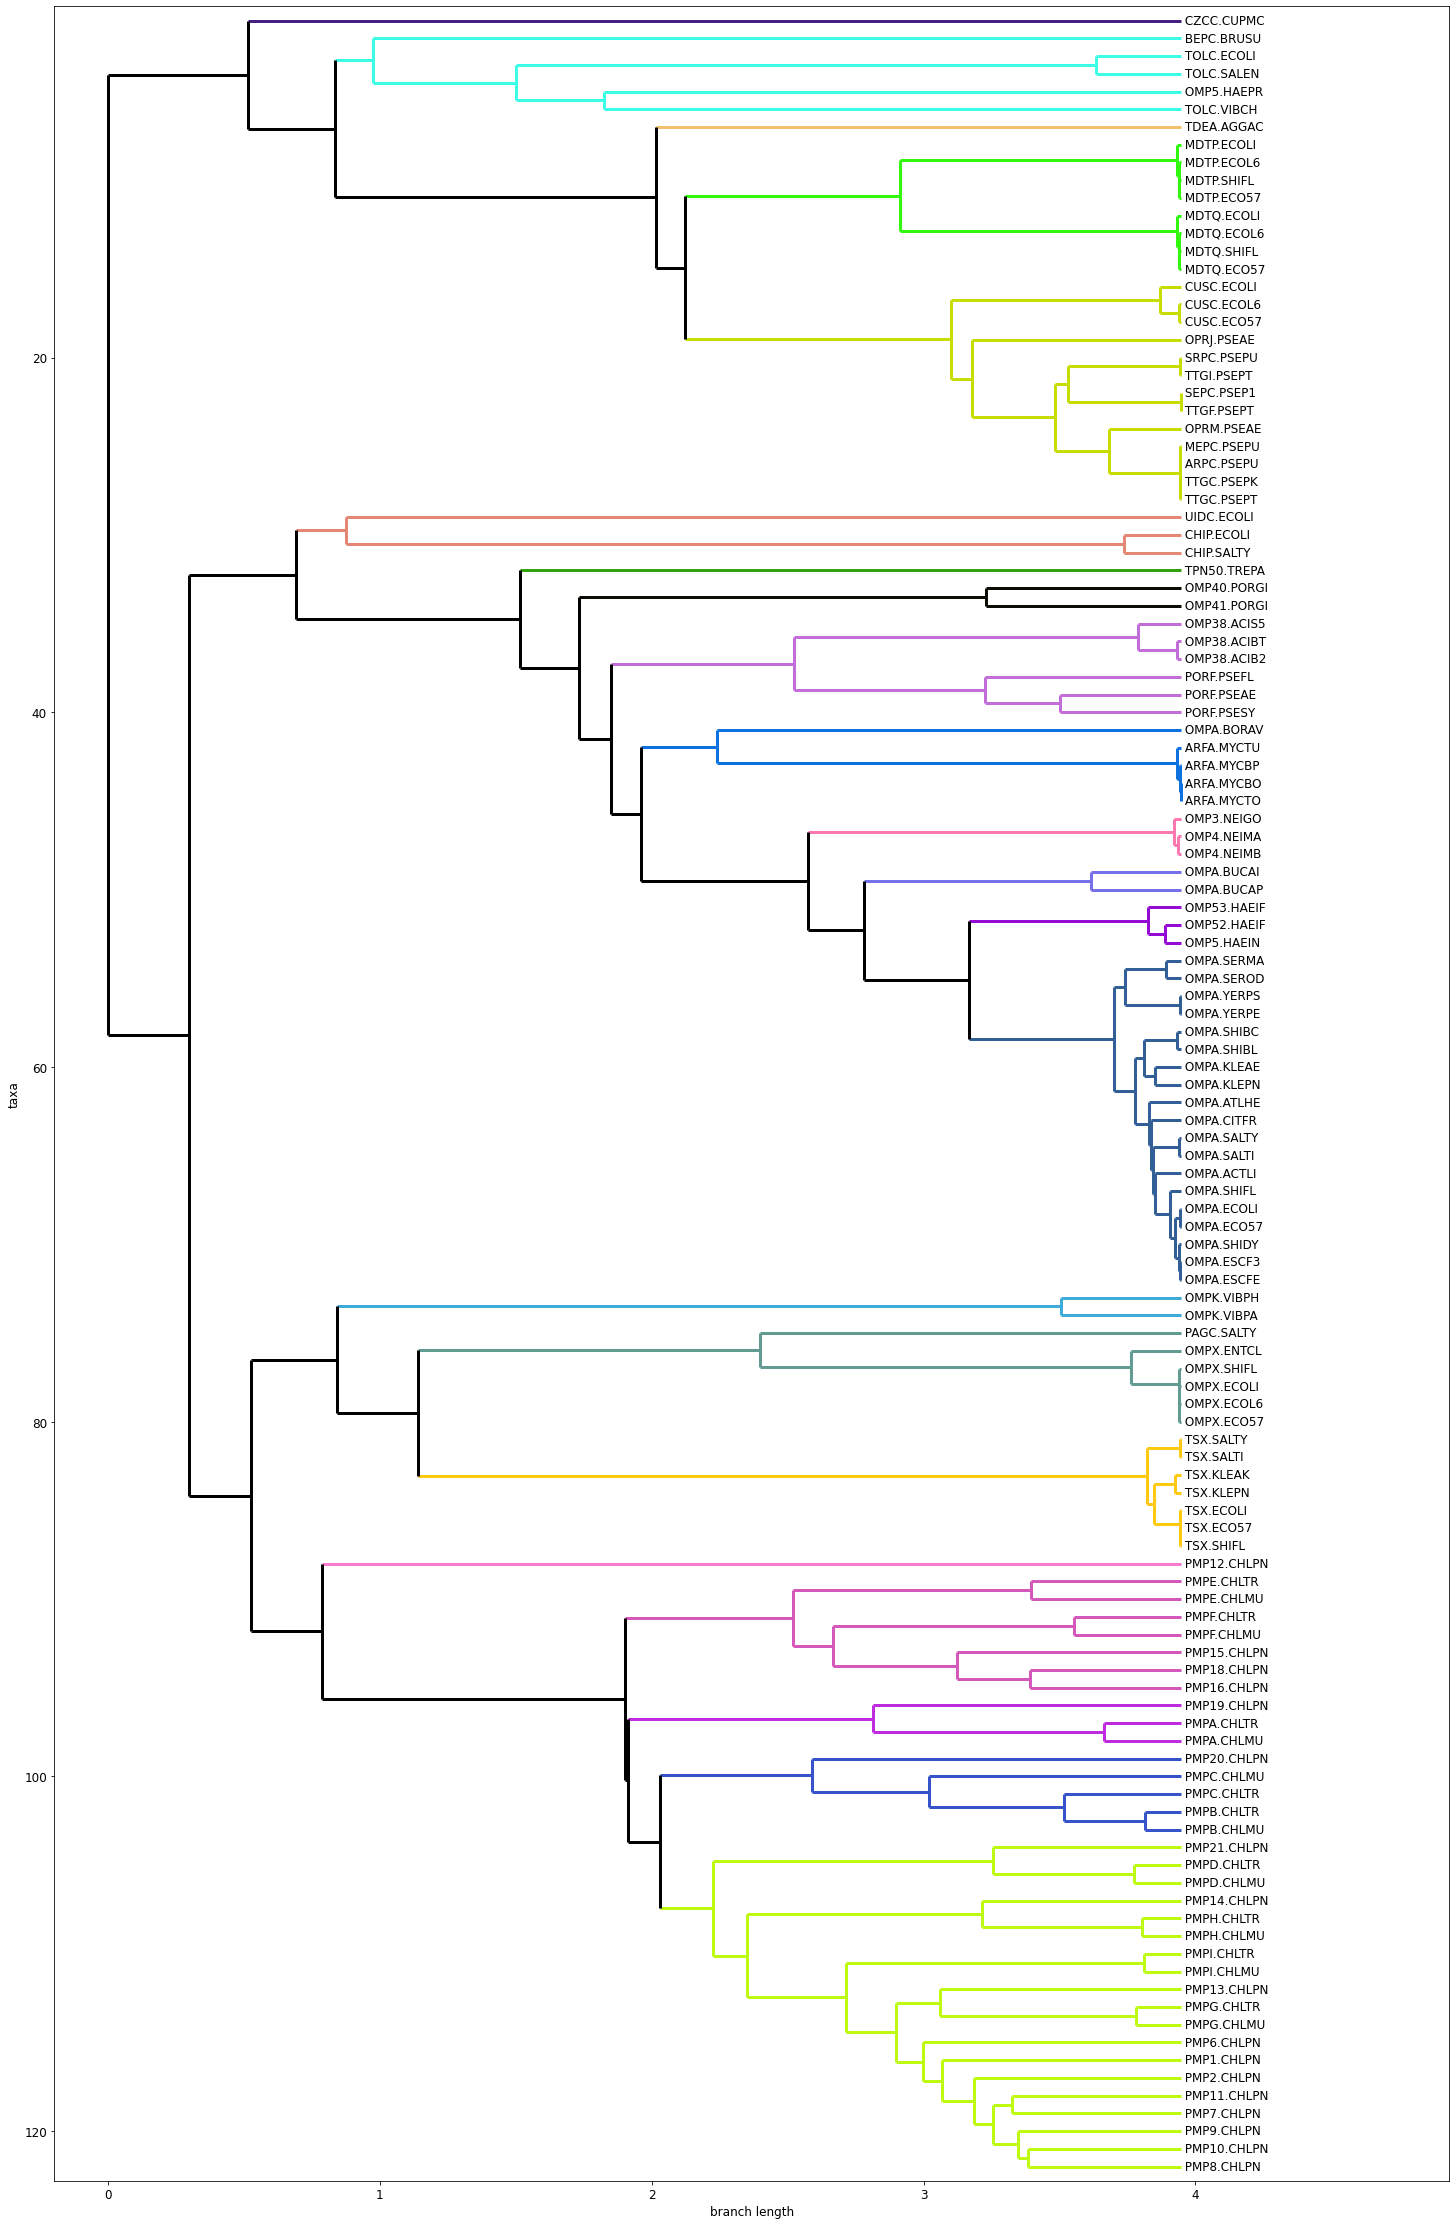

In [5]:
import collections
import pandas as pd
from Bio import Phylo
from Bio.Phylo import PhyloXML
import pylab
import matplotlib.pyplot as plt
import os
import time
import numpy as np
import random
import matplotlib.font_manager

def extract_protein_name(clade_name):
    to_pro = clade_name.split("|")[2]
    protein_name = ".".join(to_pro.split(".")[0:2])
    return protein_name

tree = Phylo.read("uniprotOMP_muscle_cah_umapemm.tree", "newick")

storage = collections.defaultdict(list)

for i in tree.find_clades():
    if i.name is None:
        continue
    if "." in i.name:
        key = i.name.split("|")[-1]
        storage[key].append(i)

second_storage = collections.defaultdict(list)
for key in storage.keys():
    for item in storage[key]:
        protein_name = extract_protein_name(item.name)
        second_storage[key].append(protein_name)

num_clades = len(storage.keys())
clade_colors = [tuple([random.randint(0, 255) for _ in range(3)]) for _ in range(num_clades)]


for idx, key in enumerate(storage.keys()):
    group = storage[key]
    color = clade_colors[idx % len(clade_colors)]
    for node in group:
        node.color = color
    clade_node = tree.common_ancestor(group)
    clade_node.color = color

for terminal in tree.get_terminals():
    terminal.name = extract_protein_name(terminal.name)
    
with plt.rc_context({'lines.linewidth': 3}):
    timestamp = time.strftime("%Y%m%d%H%M%S")
    output_filename = f"MarkedTree_{timestamp}.xml"
    Phylo.write(tree, output_filename, "phyloxml")
    tree = Phylo.read(output_filename, "phyloxml")
    plt.rc('font', size=12, family='Courier')
    Phylo.draw(tree, do_show=False, label_func=lambda x: x.name)
    fig = plt.gcf()
    fig.set_size_inches(25, 40)
    plt.savefig("MarkedTree_" + str(timestamp) + "_coloredtree.svg",format='svg',dpi=600)
    plt.show()

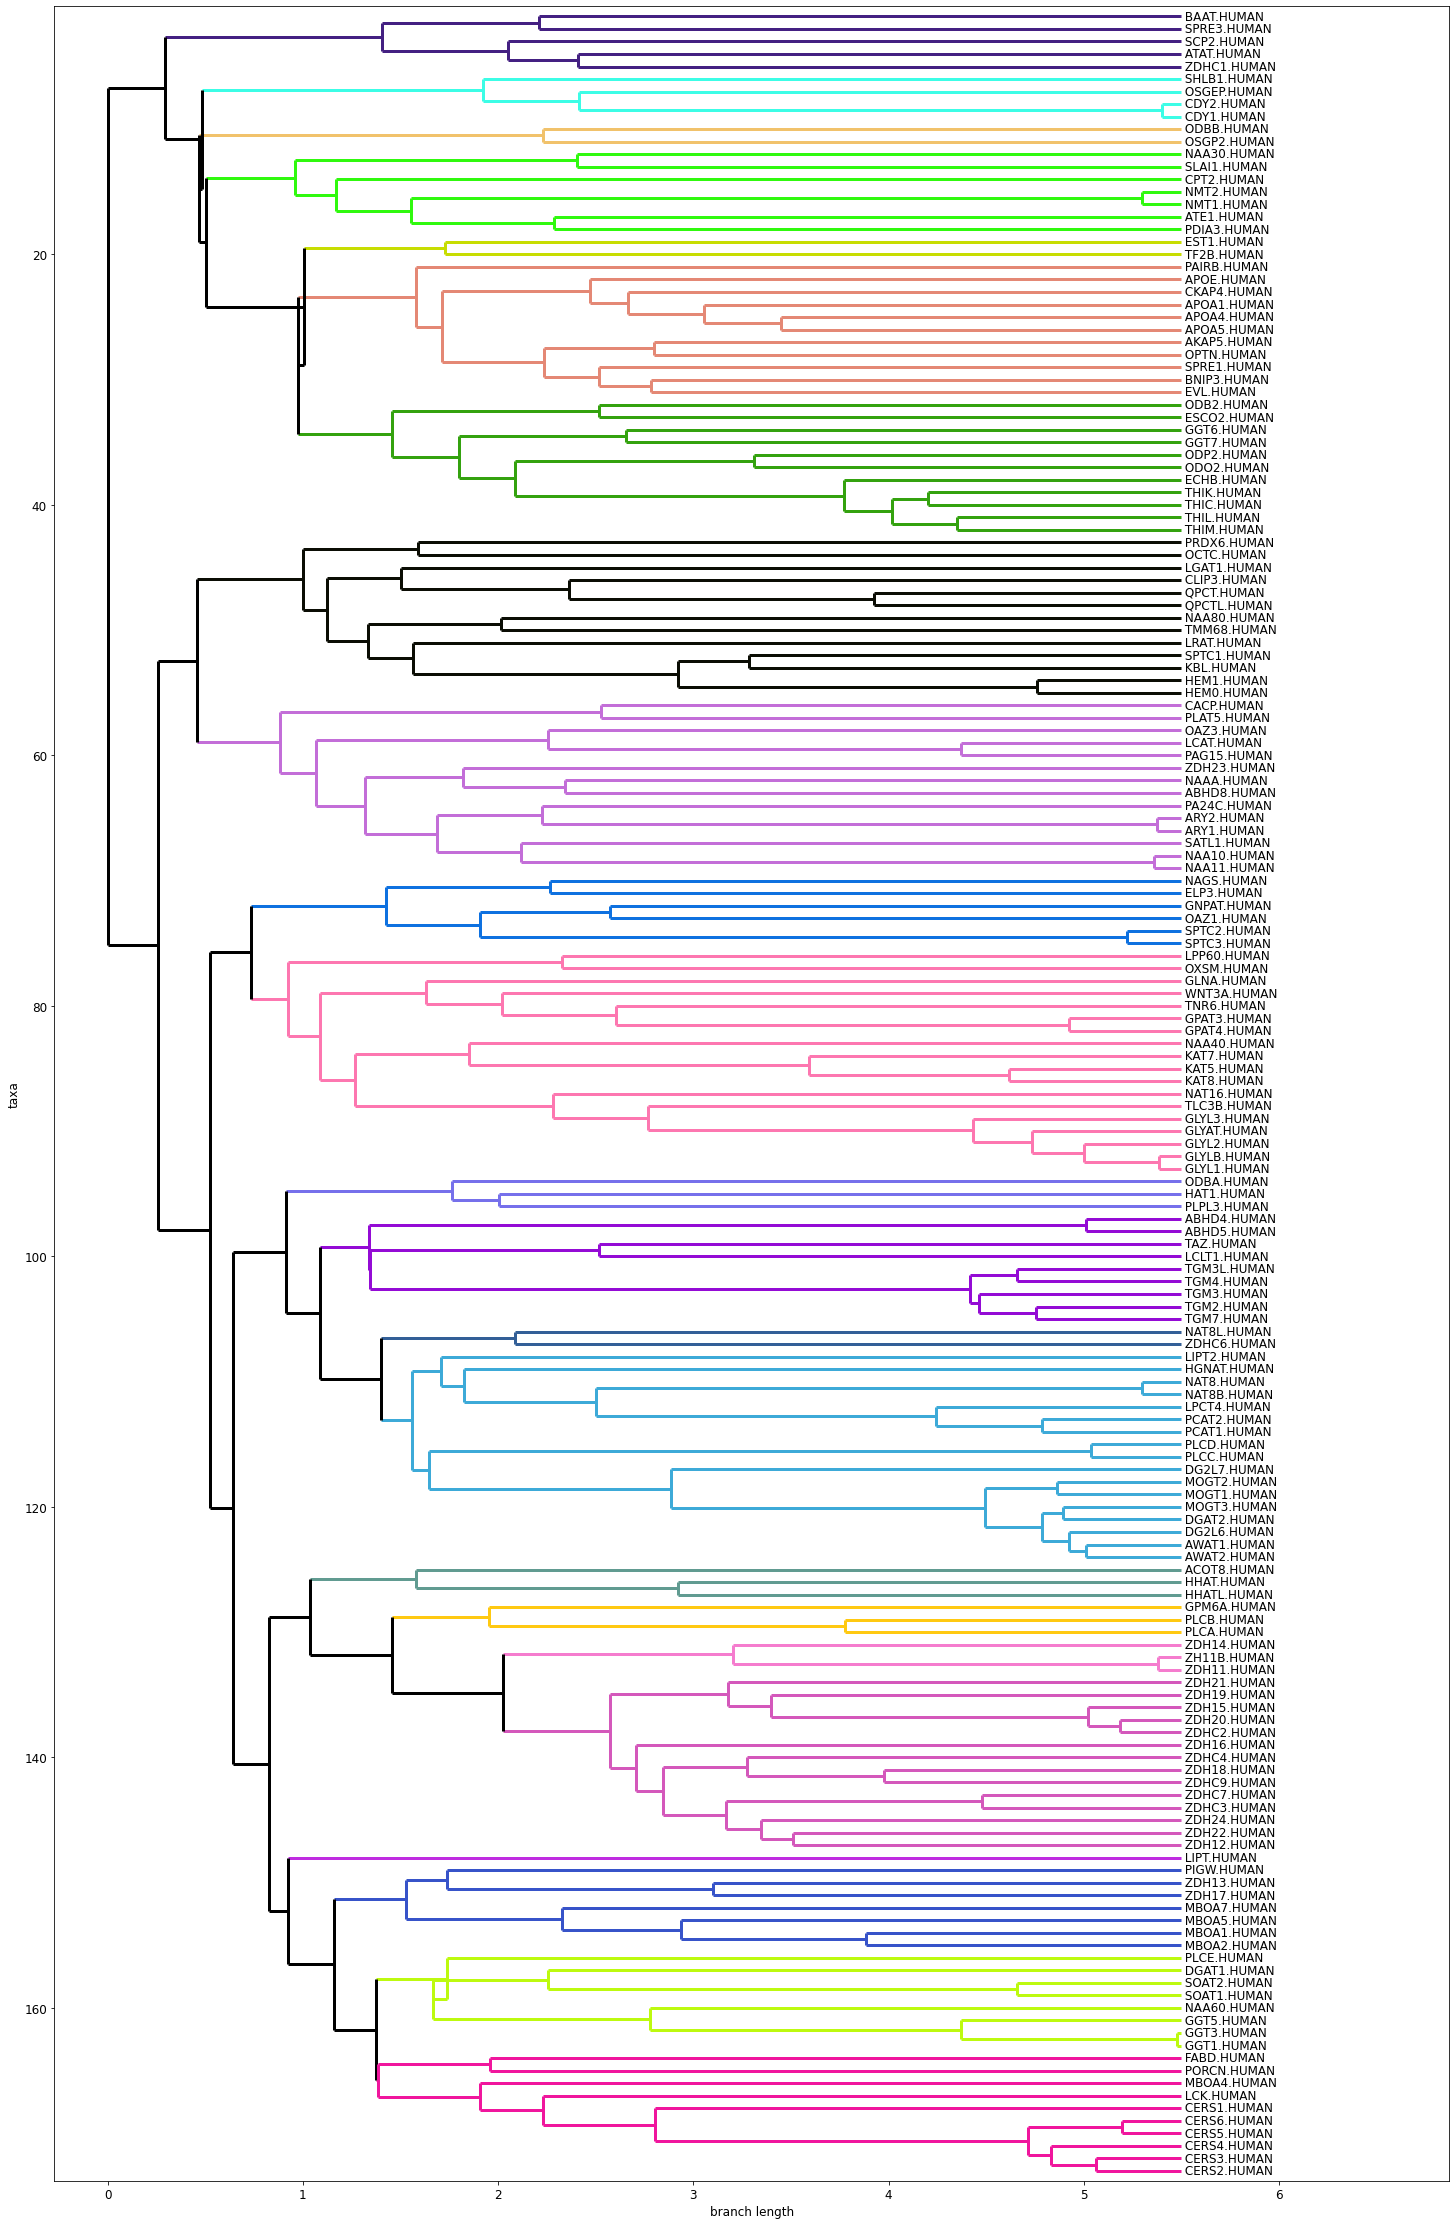

In [6]:
import collections
import pandas as pd
from Bio import Phylo
from Bio.Phylo import PhyloXML
import pylab
import matplotlib.pyplot as plt
import os
import time
import numpy as np
import random
import matplotlib.font_manager

def extract_protein_name(clade_name):
    to_pro = clade_name.split("|")[2]
    protein_name = ".".join(to_pro.split(".")[0:2])
    return protein_name

tree = Phylo.read("acyltransferase_filtered_homo.tree", "newick")

storage = collections.defaultdict(list)

for i in tree.find_clades():
    if i.name is None:
        continue
    if "." in i.name:
        key = i.name.split("|")[-1]
        storage[key].append(i)

second_storage = collections.defaultdict(list)
for key in storage.keys():
    for item in storage[key]:
        protein_name = extract_protein_name(item.name)
        second_storage[key].append(protein_name)

num_clades = len(storage.keys())
random.seed(1)
clade_colors = [tuple([random.randint(0, 255) for _ in range(3)]) for _ in range(num_clades)]


for idx, key in enumerate(storage.keys()):
    group = storage[key]
    color = clade_colors[idx % len(clade_colors)]
    for node in group:
        node.color = color
    clade_node = tree.common_ancestor(group)
    clade_node.color = color

for terminal in tree.get_terminals():
    terminal.name = extract_protein_name(terminal.name)
    
with plt.rc_context({'lines.linewidth': 3}):
    timestamp = time.strftime("%Y%m%d%H%M%S")
    output_filename = f"MarkedTree_{timestamp}.xml"
    Phylo.write(tree, output_filename, "phyloxml")
    tree = Phylo.read(output_filename, "phyloxml")
    plt.rc('font', size=12, family='Courier')
    Phylo.draw(tree, do_show=False, label_func=lambda x: x.name)
    fig = plt.gcf()
    fig.set_size_inches(25, 40)
    plt.savefig("MarkedTree_" + str(timestamp) + "_coloredtree.svg",format='svg',dpi=600)
    plt.show()


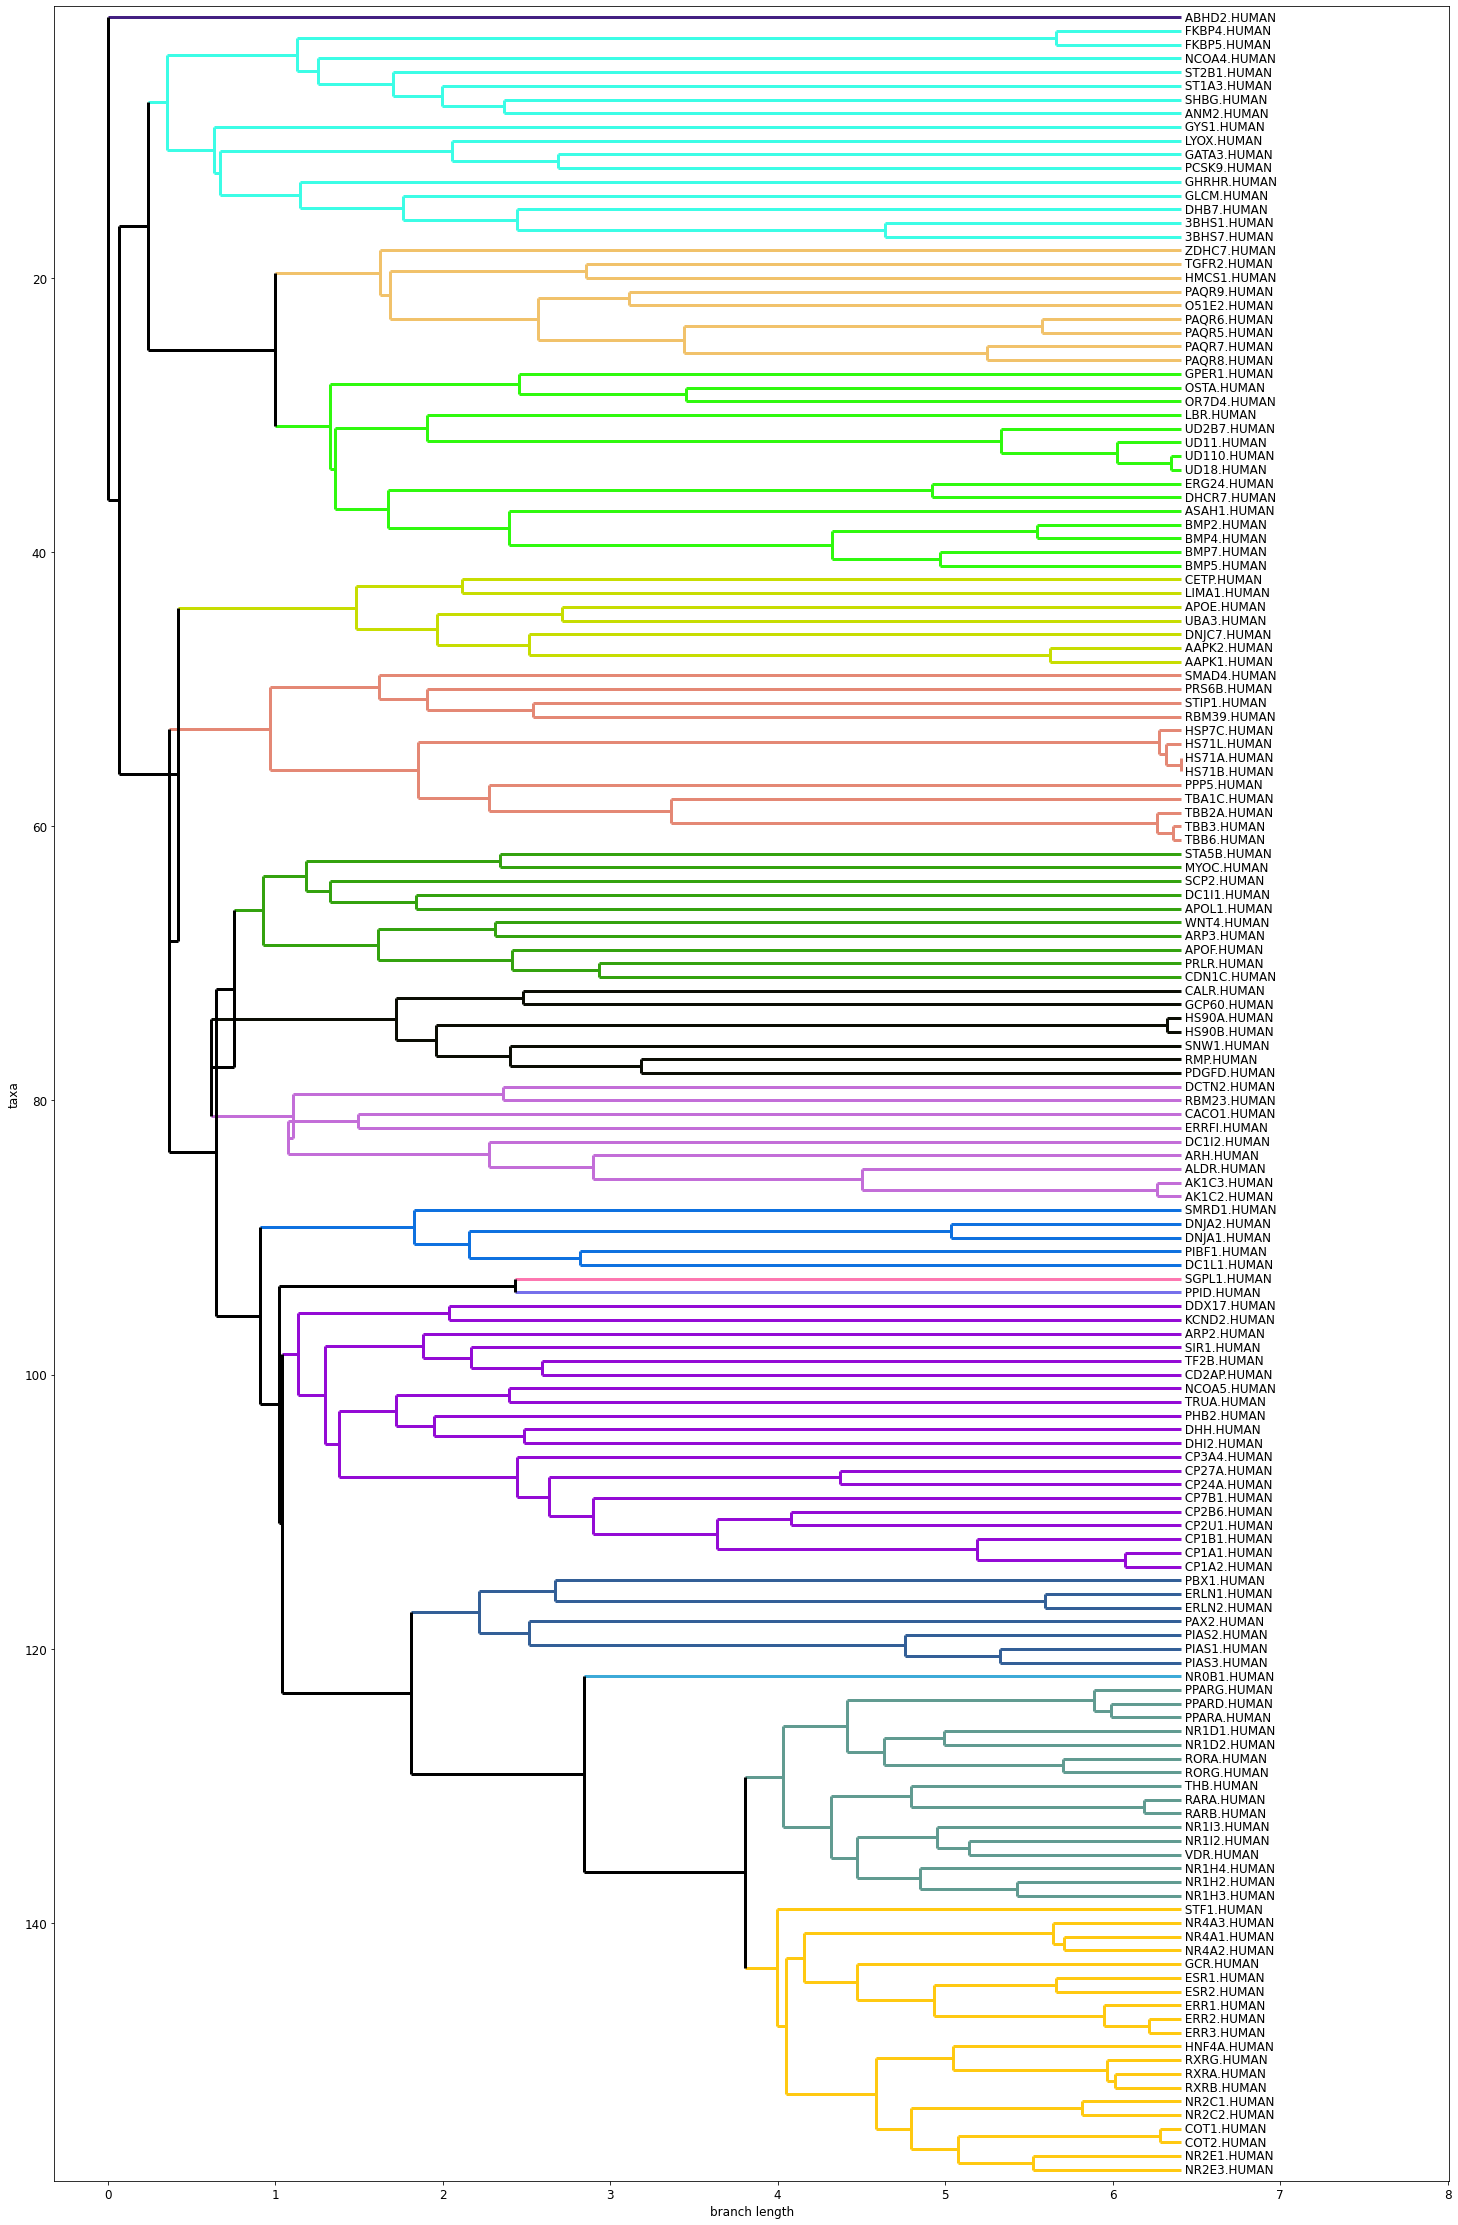

In [7]:
import collections
import pandas as pd
from Bio import Phylo
from Bio.Phylo import PhyloXML
import pylab
import matplotlib.pyplot as plt
import os
import time
import numpy as np
import random
import matplotlib.font_manager

def extract_protein_name(clade_name):
    to_pro = clade_name.split("|")[2]
    protein_name = ".".join(to_pro.split(".")[0:2])
    return protein_name

tree = Phylo.read("2022-06-22_receptor-filtered-homo-muscle_umapemm.mean.tree", "newick")

storage = collections.defaultdict(list)

for i in tree.find_clades():
    if i.name is None:
        continue
    if "." in i.name:
        key = i.name.split("|")[-1]
        storage[key].append(i)

second_storage = collections.defaultdict(list)
for key in storage.keys():
    for item in storage[key]:
        protein_name = extract_protein_name(item.name)
        second_storage[key].append(protein_name)

num_clades = len(storage.keys())
random.seed(1)
clade_colors = [tuple([random.randint(0, 255) for _ in range(3)]) for _ in range(num_clades)]


for idx, key in enumerate(storage.keys()):
    group = storage[key]
    color = clade_colors[idx % len(clade_colors)]
    for node in group:
        node.color = color
    clade_node = tree.common_ancestor(group)
    clade_node.color = color

for terminal in tree.get_terminals():
    terminal.name = extract_protein_name(terminal.name)

    
with plt.rc_context({'lines.linewidth': 3}):
    timestamp = time.strftime("%Y%m%d%H%M%S")
    output_filename = f"MarkedTree_{timestamp}.xml"
    Phylo.write(tree, output_filename, "phyloxml")
    tree = Phylo.read(output_filename, "phyloxml")
    plt.rc('font', size=12, family='Courier')
    Phylo.draw(tree, do_show=False, label_func=lambda x: x.name)
    fig = plt.gcf()
    fig.set_size_inches(25, 40)
    plt.savefig("MarkedTree_" + str(timestamp) + "_coloredtree.svg",format='svg',dpi=600)
    plt.show()
